In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms as T
import os
import glob
from PIL import Image
from torch.utils.data import Dataset
import cv2
import json

In [ ]:
!pip install torch torchvision
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
!mkdir -p /content/drive/MyDrive/dl/TrafficDetectionHW/datasets

In [ ]:
# Define the path where you want to save the dataset
dataset_path = '/content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT'

# Create the directory if it doesn't exist
os.makedirs(dataset_path, exist_ok=True)

dataset_path = '/content/drive/MyDrive/TrafficDetectionHW/datasets'

In [ ]:
%cd {dataset_path}

# Download the dataset
!wget https://zenodo.org/record/14575517/files/UAVDT.zip

# Extract the dataset
!unzip UAVDT.zip

# Remove the zip file to save space
!rm UAVDT.zip


/content/drive/MyDrive/TrafficDetectionHW/datasets
--2025-06-11 18:38:12--  https://zenodo.org/record/14575517/files/UAVDT.zip
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/14575517/files/UAVDT.zip [following]
--2025-06-11 18:38:13--  https://zenodo.org/records/14575517/files/UAVDT.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 4026830525 (3.8G) [application/octet-stream]
Saving to: ‘UAVDT.zip’

UAVDT.zip           100%[===================>]   3.75G  17.4MB/s    in 3m 42s  

2025-06-11 18:41:55 (17.3 MB/s) - ‘UAVDT.zip’ saved [4026830525/4026830525]

Archive:  UAVDT.zip
   creating: UAVDT/test/
   creating: UAVDT/test/images/
  inflating: UAVDT/test/images/det_ucystr__1027.jpg  
  inflating: UAVDT/test/images/det_ucystr__1035.jpg  
  inf

In [ ]:
!ls {dataset_path}

UAVDT


In [ ]:
%pwd

'/content/drive/MyDrive/TrafficDetectionHW/datasets'

In [ ]:
%cd {annotations_path}

# Download the annotations zip file
!wget https://archive.org/download/bdd100k/bdd100k_labels.zip

# Extract the annotations
!unzip bdd100k_labels.zip

# Remove the zip file to save space
!rm bdd100k_labels.zip


Streaming output truncated to the last 5000 lines.
  inflating: bdd100k/labels/100k/val/be6feca9-888ffd4c.json  
  inflating: bdd100k/labels/100k/val/be724abb-9a2a625c.json  
  inflating: bdd100k/labels/100k/val/be731030-7593da2a.json  
  inflating: bdd100k/labels/100k/val/be731030-82d58159.json  
  inflating: bdd100k/labels/100k/val/be731030-c29affd6.json  
  inflating: bdd100k/labels/100k/val/be73806a-cd8633af.json  
  inflating: bdd100k/labels/100k/val/be769e9f-abea5fd9.json  
  inflating: bdd100k/labels/100k/val/be769e9f-ed37df2b.json  
  inflating: bdd100k/labels/100k/val/be76ea62-78b2c8f8.json  
  inflating: bdd100k/labels/100k/val/be776742-fe6599b2.json  
  inflating: bdd100k/labels/100k/val/be777044-7db298a4.json  
  inflating: bdd100k/labels/100k/val/be777044-db29e596.json  
  inflating: bdd100k/labels/100k/val/be7783b0-b44ff154.json  
  inflating: bdd100k/labels/100k/val/be791a81-a6b53fef.json  
  inflating: bdd100k/labels/100k/val/be7b856e-d1ece683.json  
  inflating: bdd100

In [ ]:
yaml_content = """
path: /content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT
train: train/images
val: val/images
test: test/images

names:
  0: car
  1: bus
  2: truck
"""

with open("uavdt.yaml", "w") as f:
    f.write(yaml_content)

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(
    data="uavdt.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    project="/content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8",
    name="yolov8n_results"
)

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=uavdt.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_results2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, 

train: Scanning /content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/train/labels... 1266 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1266/1266 [08:44<00:00,  2.41it/s]

train: /content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/train/images/DJI_0955 (6_23)_n0.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/train/images/lim_1050.jpg: 1 duplicate labels removed
train: /content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/train/images/lim_3630.jpg: 1 duplicate labels removed


train: New cache created: /content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.0±0.6 ms, read: 1.8±1.5 MB/s, size: 1031.1 KB)


val: Scanning /content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/val/labels... 271 images, 0 backgrounds, 0 corrupt: 100%|██████████| 271/271 [02:41<00:00,  1.67it/s]

val: New cache created: /content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/val/labels.cache


Plotting labels to /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8/yolov8n_results2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8/yolov8n_results2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.54G      2.545      2.524      1.012         82        640: 100%|██████████| 80/80 [01:48<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:15<00:00,  1.77s/it]

                   all        271       7046     0.0489      0.366      0.187     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.54G      2.202      1.428     0.9186        126        640: 100%|██████████| 80/80 [01:12<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.34s/it]

                   all        271       7046      0.369      0.386      0.349      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.13G      2.078      1.252     0.8963         39        640: 100%|██████████| 80/80 [01:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.31s/it]

                   all        271       7046      0.532      0.549      0.473      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.13G      2.048      1.172     0.8961         97        640: 100%|██████████| 80/80 [01:12<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.21s/it]

                   all        271       7046      0.553      0.572      0.514      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.13G      1.976      1.085     0.8865         92        640: 100%|██████████| 80/80 [01:05<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.23s/it]


                   all        271       7046      0.577      0.597      0.556      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.13G      1.953      1.042     0.8824        152        640: 100%|██████████| 80/80 [01:11<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]

                   all        271       7046      0.591      0.665      0.618       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.13G      1.917      1.006     0.8756         83        640: 100%|██████████| 80/80 [01:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.19s/it]


                   all        271       7046      0.649      0.667      0.674      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.14G      1.853     0.9726     0.8739         66        640: 100%|██████████| 80/80 [01:13<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.30s/it]

                   all        271       7046       0.64      0.612       0.65       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.14G      1.904     0.9683     0.8744         55        640: 100%|██████████| 80/80 [01:12<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.17s/it]


                   all        271       7046      0.673       0.63      0.685      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.14G      1.856     0.9477     0.8726        111        640: 100%|██████████| 80/80 [01:09<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.23s/it]

                   all        271       7046      0.744      0.637      0.724      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.14G      1.845     0.9445     0.8709         95        640: 100%|██████████| 80/80 [01:15<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.22s/it]


                   all        271       7046      0.622      0.707      0.725      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.21G      1.821     0.9074     0.8721         42        640: 100%|██████████| 80/80 [01:07<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.16s/it]

                   all        271       7046      0.715      0.675      0.716      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.23G      1.829     0.9033     0.8678         89        640: 100%|██████████| 80/80 [01:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.17s/it]

                   all        271       7046      0.746      0.689      0.744      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.25G      1.803      0.876      0.864         42        640: 100%|██████████| 80/80 [01:07<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.30s/it]

                   all        271       7046      0.735      0.638      0.731      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.27G      1.791     0.8598      0.864         81        640: 100%|██████████| 80/80 [01:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]

                   all        271       7046      0.792      0.675      0.747      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.27G      1.812     0.8568      0.859         46        640: 100%|██████████| 80/80 [01:11<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.14s/it]

                   all        271       7046      0.771       0.66      0.759      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.27G      1.747     0.8251     0.8584         23        640: 100%|██████████| 80/80 [01:05<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]

                   all        271       7046      0.804      0.698      0.784      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.28G      1.751     0.8404     0.8571         72        640: 100%|██████████| 80/80 [01:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.17s/it]

                   all        271       7046      0.776      0.711      0.777      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.28G      1.759     0.8292     0.8546         58        640: 100%|██████████| 80/80 [01:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.20s/it]

                   all        271       7046      0.783      0.698      0.785      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.28G      1.716     0.8058     0.8588         47        640: 100%|██████████| 80/80 [01:07<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.12s/it]

                   all        271       7046      0.758      0.722      0.784      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.28G      1.711     0.7968     0.8583        111        640: 100%|██████████| 80/80 [01:07<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]

                   all        271       7046      0.783      0.691      0.777      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.28G      1.695      0.796     0.8554        128        640: 100%|██████████| 80/80 [01:07<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.11s/it]

                   all        271       7046      0.723      0.722      0.741       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       7.3G      1.717     0.8061     0.8533         75        640: 100%|██████████| 80/80 [01:08<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.22s/it]

                   all        271       7046      0.761        0.7      0.781      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       7.3G      1.701     0.7863     0.8549         90        640: 100%|██████████| 80/80 [01:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.29s/it]

                   all        271       7046       0.81      0.723      0.788       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       7.3G      1.693     0.7791     0.8541        143        640: 100%|██████████| 80/80 [01:11<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.20s/it]


                   all        271       7046      0.796       0.71      0.783      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      8.55G      1.671     0.7745     0.8532         33        640: 100%|██████████| 80/80 [01:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.10s/it]

                   all        271       7046      0.821      0.686      0.788      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       3.4G      1.664     0.7666     0.8491         33        640: 100%|██████████| 80/80 [01:05<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.31s/it]

                   all        271       7046       0.83      0.697       0.79      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.05G      1.666     0.7693     0.8472         57        640: 100%|██████████| 80/80 [01:06<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.29s/it]


                   all        271       7046      0.828       0.71      0.801      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.05G      1.666     0.7665     0.8483         26        640: 100%|██████████| 80/80 [01:10<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.08s/it]


                   all        271       7046      0.816      0.727      0.807      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.05G      1.631     0.7478     0.8514        142        640: 100%|██████████| 80/80 [01:08<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.24s/it]


                   all        271       7046      0.765      0.755      0.806      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.06G      1.626     0.7423     0.8453         78        640: 100%|██████████| 80/80 [01:11<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.22s/it]

                   all        271       7046       0.77      0.736      0.792      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.08G      1.623     0.7397     0.8469         42        640: 100%|██████████| 80/80 [01:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.20s/it]


                   all        271       7046      0.827      0.706      0.804      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.09G       1.63     0.7356     0.8448         21        640: 100%|██████████| 80/80 [01:06<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.22s/it]


                   all        271       7046      0.832      0.712      0.805      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.09G      1.615     0.7309     0.8449         70        640: 100%|██████████| 80/80 [01:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]

                   all        271       7046      0.755      0.752        0.8       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       5.1G      1.608      0.731     0.8438        129        640: 100%|██████████| 80/80 [01:07<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.20s/it]

                   all        271       7046      0.826      0.733      0.818      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       5.1G      1.592     0.7242     0.8433        105        640: 100%|██████████| 80/80 [01:04<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.39s/it]

                   all        271       7046      0.759      0.746      0.805      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       5.1G      1.607      0.727     0.8403        132        640: 100%|██████████| 80/80 [01:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.17s/it]

                   all        271       7046       0.85      0.705      0.824      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       5.1G      1.594     0.7213     0.8418        134        640: 100%|██████████| 80/80 [01:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.07s/it]

                   all        271       7046      0.806       0.74      0.824      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.99G      1.618     0.7268     0.8404        110        640: 100%|██████████| 80/80 [01:06<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.16s/it]


                   all        271       7046      0.809      0.776      0.839      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.99G      1.565     0.7071      0.837        165        640: 100%|██████████| 80/80 [01:05<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.07s/it]

                   all        271       7046      0.822      0.759      0.833      0.499


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.99G      1.523     0.6917     0.8503         38        640: 100%|██████████| 80/80 [01:15<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.09s/it]

                   all        271       7046      0.833       0.72      0.823      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.99G      1.528     0.6827     0.8451         54        640: 100%|██████████| 80/80 [01:04<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.16s/it]

                   all        271       7046      0.854      0.728       0.83      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.99G      1.512     0.6806     0.8411         25        640: 100%|██████████| 80/80 [01:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.38s/it]

                   all        271       7046      0.834      0.759      0.833        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.99G      1.503     0.6725     0.8392         33        640: 100%|██████████| 80/80 [01:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.33s/it]

                   all        271       7046      0.844       0.74      0.831      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.99G      1.483     0.6644     0.8392         73        640: 100%|██████████| 80/80 [01:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.12s/it]

                   all        271       7046      0.827      0.755      0.828      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.99G      1.479     0.6639      0.839         35        640: 100%|██████████| 80/80 [01:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.19s/it]

                   all        271       7046      0.846      0.737      0.836      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.99G      1.476      0.659     0.8429         40        640: 100%|██████████| 80/80 [01:09<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]

                   all        271       7046      0.834      0.737      0.828      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.99G      1.457     0.6452     0.8434         13        640: 100%|██████████| 80/80 [01:12<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.18s/it]

                   all        271       7046      0.835      0.758      0.834      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.01G      1.466     0.6486      0.838         53        640: 100%|██████████| 80/80 [01:10<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.11s/it]

                   all        271       7046      0.835      0.762      0.837      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.02G      1.443     0.6392     0.8356         51        640: 100%|██████████| 80/80 [01:15<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]

                   all        271       7046      0.862      0.742      0.842      0.508



50 epochs completed in 1.143 hours.
Optimizer stripped from /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8/yolov8n_results2/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8/yolov8n_results2/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8/yolov8n_results2/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.43s/it]


                   all        271       7046      0.842      0.753      0.837       0.51
                   car        271       6748      0.903      0.881      0.938      0.504
                   bus         54         66      0.883      0.688      0.807      0.553
                 truck        121        232      0.741       0.69      0.767      0.472
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8/yolov8n_results2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79da5bf87f10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
from ultralytics import YOLO
import os
import cv2
import numpy as np
from pathlib import Path
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

# Paths
MODEL_PATH = "/content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8/yolov8n_results2/weights/best.pt"
TEST_DATA_PATH = "/content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/test/images"  # Replace with actual path to test images
TEST_LABELS_PATH = "/content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/test/labels"  # Replace with actual path to .txt labels
OUTPUT_DIR = "/content/drive/MyDrive/TrafficDetectionHW/predictions"  # Directory to save annotated images
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load the trained YOLOv8 model
model = YOLO(MODEL_PATH)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Using device: cpu
YOLOv8 model loaded from: /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8/yolov8n_results2/weights/best.pt
Loaded 272 test images for YOLOv8 evaluation.

Starting YOLOv8 inference and evaluation...
Processed 10/272 images for YOLOv8.
Processed 20/272 images for YOLOv8.
Processed 30/272 images for YOLOv8.
Processed 40/272 images for YOLOv8.
Processed 50/272 images for YOLOv8.
Processed 60/272 images for YOLOv8.
Processed 70/272 images for YOLOv8.
Processed 80/272 images for YOLOv8.
Processed 90/272 images for YOLOv8.
Processed 100/272 images for YOLOv8.
Processed 110/272 images for YOLOv8.
Processed 120/272 images for YOLOv8.
Processed 130/272 images for YOLOv8.
Processed 140/272 images for YOLOv8.
Processed 150/272 images for YOLOv8.
Processed 160/272 images for YOLOv8.
Processed 170/272 images for YOLOv8.
Processed 180/272 images for YOLOv8.
Processed 190/272 images for YOLOv8.
Processed 200/272 images for YOLOv8.
Processed 210/272 images for YOLOv8.
Pr

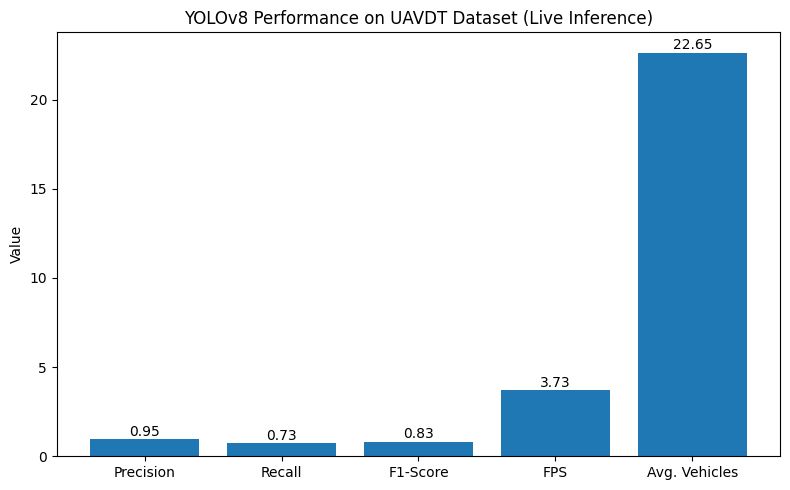

In [ ]:
import os
import cv2
import numpy as np
from pathlib import Path
from ultralytics import YOLO
import torch
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import glob
from PIL import Image
import time

# --- Paths ---
YOLO_MODEL_PATH = "/content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8/yolov8n_results2/weights/best.pt"
TEST_DATA_PATH = "/content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/test/images"
TEST_LABELS_PATH = "/content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/test/labels"
OUTPUT_DIR_YOLO = "/content/drive/MyDrive/TrafficDetectionHW/outputs/predictions_yolo_live"
os.makedirs(OUTPUT_DIR_YOLO, exist_ok=True)

# --- Custom Dataset for Ground Truth (YOLO format) ---
class YOLO_GT_Dataset(Dataset):
    def __init__(self, img_root, label_root):
        self.img_root = img_root
        self.label_root = label_root # Corrected: use label_root
        self.img_files = sorted([f for f in os.listdir(img_root) if f.endswith(('.jpg', '.jpeg', '.png'))])

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_name = self.img_files[idx]
        img_path = os.path.join(self.img_root, img_name)
        label_path = os.path.join(self.label_root, img_name.replace(os.path.splitext(img_name)[1], '.txt')) # Corrected: use self.label_root

        img = Image.open(img_path).convert("RGB")
        orig_width, orig_height = img.size

        boxes = [] # YOLO format: [x_center, y_center, width, height] (normalized)
        labels = []
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f.readlines():
                    parts = list(map(float, line.strip().split()))
                    cls = int(parts[0])
                    # Ensure bbox has 4 elements
                    if len(parts) >= 5:
                        xc, yc, w, h = parts[1:5]
                        boxes.append([xc, yc, w, h])
                        labels.append(cls)       # Class ID

        return img_name, orig_width, orig_height, {'boxes': torch.tensor(boxes, dtype=torch.float32), 'labels': torch.tensor(labels, dtype=torch.int64)}

# --- Evaluation Functions (adjusted for YOLO format) ---
def compute_iou_yolo(box1, box2):
    # Convert from normalized center-width-height to x1y1x2y2
    # Assume boxes are already normalized [0,1]
    x1_1 = box1[0] - box1[2] / 2
    y1_1 = box1[1] - box1[3] / 2
    x1_2 = box1[0] + box1[2] / 2
    y1_2 = box1[1] + box1[3] / 2

    x2_1 = box2[0] - box2[2] / 2
    y2_1 = box2[1] - box2[3] / 2
    x2_2 = box2[0] + box2[2] / 2
    y2_2 = box2[1] + box2[3] / 2

    xi1 = max(x1_1, x2_1)
    yi1 = max(y1_1, y2_1)
    xi2 = min(x1_2, x2_2)
    yi2 = min(y1_2, y2_2)

    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    box1_area = box1[2] * box1[3]
    box2_area = box2[2] * box2[3]

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0

def evaluate_predictions_yolo(ground_truth, predictions, iou_threshold=0.5):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    prediction_matched_flags = [False] * len(predictions)

    for gt_idx, gt in enumerate(ground_truth):
        img_id = gt['image_id']
        gt_bbox = gt['bbox']
        gt_class = gt['category_id']

        best_iou = 0
        best_pred_global_idx = -1

        # Find the best prediction for this ground truth among *unmatched* predictions
        for pred_global_idx, pred in enumerate(predictions):
            if not prediction_matched_flags[pred_global_idx] and \
               pred['image_id'] == img_id and \
               pred['category_id'] == gt_class:

                iou = compute_iou_yolo(gt_bbox, pred['bbox'])
                if iou > best_iou:
                    best_iou = iou
                    best_pred_global_idx = pred_global_idx

        if best_iou >= iou_threshold:
            true_positives += 1
            if best_pred_global_idx != -1:
                prediction_matched_flags[best_pred_global_idx] = True
        else:
            false_negatives += 1

    # Count false positives: any prediction that wasn't marked as matched
    for matched in prediction_matched_flags:
        if not matched:
            false_positives += 1

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    mAP_at_05 = 0 # Placeholder, as full mAP requires more detailed logic.

    return {'mAP@0.5': mAP_at_05, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}


# --- Main YOLOv8 Evaluation Script ---
def evaluate_yolov8():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Load YOLOv8 model
    yolo_model = YOLO(YOLO_MODEL_PATH)
    print(f"YOLOv8 model loaded from: {YOLO_MODEL_PATH}")

    # Load test dataset
    test_dataset = YOLO_GT_Dataset(TEST_DATA_PATH, TEST_LABELS_PATH)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=os.cpu_count())
    print(f"Loaded {len(test_dataset)} test images for YOLOv8 evaluation.")

    yolo_predictions = []
    ground_truth_data = []
    yolo_vehicle_counts = []
    yolo_inference_times_live = []

    print("\nStarting YOLOv8 inference and evaluation...")
    for i, (img_name_batch, orig_width_batch, orig_height_batch, gt_target_batch) in enumerate(test_loader):
        # Unpack batch for single image processing
        img_name = img_name_batch[0]
        orig_width = orig_width_batch.item()
        orig_height = orig_height_batch.item()
        gt_boxes = gt_target_batch['boxes'][0].numpy() # Get the actual numpy array for boxes
        gt_labels = gt_target_batch['labels'][0].numpy() # Get the actual numpy array for labels

        image_path_full = os.path.join(TEST_DATA_PATH, img_name)
        if not os.path.exists(image_path_full):
            print(f"Warning: Image file not found: {image_path_full}. Skipping.")
            continue

        # Run YOLOv8 inference
        start_time = time.time()
        results = yolo_model(image_path_full, conf=0.5, iou=0.5, verbose=False) # verbose=False to suppress individual image outputs
        end_time = time.time()
        yolo_inference_times_live.append((end_time - start_time) * 1000) # Convert to ms

        yolo_count = 0
        current_image_preds = []

        # Process YOLOv8 results
        for result in results:
            if result.boxes is not None and result.boxes.xywhn is not None: # Check if detections exist and normalized boxes are available
                boxes = result.boxes.xywhn.cpu().numpy()  # Normalized xywh boxes
                scores = result.boxes.conf.cpu().numpy()
                classes = result.boxes.cls.cpu().numpy().astype(int)

                for box, score, cls in zip(boxes, scores, classes):
                    yolo_predictions.append({
                        'image_id': img_name,
                        'bbox': box.tolist(), # Already normalized YOLO format
                        'score': float(score),
                        'category_id': int(cls)
                    })
                    current_image_preds.append((box, score, cls))
                    yolo_count += 1

            # --- Visualize and Save YOLOv8 Predictions ---
            yolo_img_vis = cv2.imread(image_path_full)
            if yolo_img_vis is None:
                print(f"Error: Could not read image for visualization: {image_path_full}")
                continue

            for box, score, cls in current_image_preds:
                # Convert normalized YOLO bbox to pixel coordinates for drawing
                x_center, y_center, width, height = box
                x1 = int((x_center - width/2) * orig_width)
                y1 = int((y_center - height/2) * orig_height)
                x2 = int((x_center + width/2) * orig_width)
                y2 = int((y_center + height/2) * orig_height)

                cv2.rectangle(yolo_img_vis, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(yolo_img_vis, f'Class {cls} {score:.2f}', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            cv2.imwrite(os.path.join(OUTPUT_DIR_YOLO, f"yolo_pred_{img_name}"), yolo_img_vis)

        yolo_vehicle_counts.append(yolo_count)

        # Collect Ground Truth
        for gt_box, gt_label in zip(gt_boxes, gt_labels):
            ground_truth_data.append({
                'image_id': img_name,
                'bbox': gt_box.tolist(), # Already normalized YOLO format
                'category_id': int(gt_label) # Fixed: gt_label is now a scalar
            })

        if (i + 1) % 10 == 0:
            print(f"Processed {i + 1}/{len(test_dataset)} images for YOLOv8.")

    # Calculate YOLOv8 metrics
    yolo_metrics = evaluate_predictions_yolo(ground_truth_data, yolo_predictions)
    yolo_metrics['FPS'] = 1000 / np.mean(yolo_inference_times_live) if yolo_inference_times_live else 0
    yolo_metrics['Avg_Vehicles'] = np.mean(yolo_vehicle_counts) if yolo_vehicle_counts else 0

    print("\n--- YOLOv8 Performance Metrics ---")
    print(f"mAP@0.5 (approx): {yolo_metrics['mAP@0.5']:.3f}") # Note: This mAP is simplified
    print(f"Precision: {yolo_metrics['Precision']:.3f}")
    print(f"Recall: {yolo_metrics['Recall']:.3f}")
    print(f"F1-Score: {yolo_metrics['F1-Score']:.3f}")
    print(f"Average FPS: {yolo_metrics['FPS']:.2f}")
    print(f"Average Vehicles per Frame: {yolo_metrics['Avg_Vehicles']:.2f}")

    # Plotting (YOLOv8 only)
    metrics_names = ['Precision', 'Recall', 'F1-Score', 'FPS', 'Avg. Vehicles']
    yolo_values = [
        yolo_metrics['Precision'],
        yolo_metrics['Recall'],
        yolo_metrics['F1-Score'],
        yolo_metrics['FPS'],
        yolo_metrics['Avg_Vehicles']
    ]

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(metrics_names, yolo_values, color='#1f77b4')
    ax.set_ylabel('Value')
    ax.set_title('YOLOv8 Performance on UAVDT Dataset (Live Inference)')
    for i, v in enumerate(yolo_values):
        ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR_YOLO, 'yolov8_performance_live.png'))
    plt.show()

if __name__ == "__main__":
    evaluate_yolov8()

In [ ]:
BASE = '/content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT'
# for split in ['train', 'val', 'test']:
#     os.makedirs(os.path.join(BASE, split, 'images'), exist_ok=True)
#     os.makedirs(os.path.join(BASE, split, 'labels'), exist_ok=True)

print("Structure ready:", os.listdir(BASE))

Structure ready: ['test', 'train', 'val']


In [ ]:
# Define transforms
transform = T.Compose([
    T.ToTensor()
])

# Define transforms (same as training)
transform = T.Compose([T.ToTensor()])

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms=None):
        self.root = root
        self.transforms = transforms

        self.img_dir = os.path.join(root, "images")
        self.label_dir = os.path.join(root, "labels")
        self.imgs = sorted(os.listdir(self.img_dir))

    def __getitem__(self, idx):
        img_name = self.imgs[idx]
        img_path = os.path.join(self.img_dir, img_name)
        label_path = os.path.join(self.label_dir, img_name.replace(".jpg", ".txt").replace(".png", ".txt"))

        # Load image
        img = Image.open(img_path).convert("RGB")
        img_width, img_height = img.size

        # Load and convert bounding boxes
        boxes = []
        labels = []

        with open(label_path, "r") as f:
            for line in f.readlines():
                cls, xc, yc, w, h = map(float, line.strip().split())
                x1 = (xc - w / 2) * img_width
                y1 = (yc - h / 2) * img_height
                x2 = (xc + w / 2) * img_width
                y2 = (yc + h / 2) * img_height

                boxes.append([x1, y1, x2, y2])
                labels.append(int(cls) + 1)  # Add 1 because class 0 is background in Faster R-CNN

        # Build target
        target = {
            "boxes": torch.tensor(boxes, dtype=torch.float32),
            "labels": torch.tensor(labels, dtype=torch.int64)
        }

        if self.transforms:
            img = self.transforms(img)

        return img, target

    def __len__(self):
        return len(self.imgs)


**RCNN**

In [ ]:
!pip install tqdm

In [ ]:
# Training RNN
from tqdm import tqdm

# Load dataset
dataset = CustomDataset("/content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/train", transforms=transform)
indices = torch.randperm(len(dataset)).tolist()
train_dataset = torch.utils.data.Subset(dataset, indices[:-50])
valid_dataset = torch.utils.data.Subset(dataset, indices[-50:])


# Folder for Checkpoints
checkpoint_dir = "/content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
valid_loader = DataLoader(valid_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# Model setup
model = fasterrcnn_resnet50_fpn(pretrained=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 4)  # 3 classes + background

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Hyperparameters
learning_rate = 0.005
momentum = 0.9
weight_decay = 0.0005
num_epochs = 10
step_size = 3
gamma = 0.1

# Optimizer and scheduler
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=learning_rate, momentum=momentum, weight_decay=weight_decay)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

#TODO:  Save the Modal Checkpoints

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    # Add progress bar to the batch loop
    with tqdm(total=len(train_loader), desc=f"Epoch [{epoch+1}/{num_epochs}]", unit="batch") as pbar:
        for images, targets in train_loader:
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            optimizer.zero_grad()
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            losses.backward()
            optimizer.step()
            train_loss += losses.item()

            pbar.set_postfix({"loss": f"{losses.item():.4f}"})
            pbar.update(1)

    lr_scheduler.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss / len(train_loader):.4f}")
    # Save checkpoint
    checkpoint_path = os.path.join(checkpoint_dir, f"model_epoch_{epoch+1}.pth")
    torch.save(model.state_dict(), checkpoint_path)
    print(f"Saved model checkpoint at {checkpoint_path}")


print("Training Complete!")

final_model_path = "/content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/final_model.pth"
torch.save(model.state_dict(), final_model_path)
print(f"Saved final model at {final_model_path}")


# Evaluation mode
model.eval()
with torch.no_grad():
    for images, targets in valid_loader:
        images = list(img.to(device) for img in images)
        outputs = model(images)
        print(outputs[0]['boxes'], outputs[0]['labels'])





/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch [1/10]: 100%|██████████| 304/304 [26:49<00:00,  5.30s/batch, loss=0.5560]


Epoch [1/10], Loss: 0.6520
Saved model checkpoint at /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints/model_epoch_1.pth


Epoch [2/10]: 100%|██████████| 304/304 [09:03<00:00,  1.79s/batch, loss=0.4099]


Epoch [2/10], Loss: 0.4955
Saved model checkpoint at /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints/model_epoch_2.pth


Epoch [3/10]: 100%|██████████| 304/304 [08:59<00:00,  1.77s/batch, loss=0.4252]


Epoch [3/10], Loss: 0.4584
Saved model checkpoint at /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints/model_epoch_3.pth


Epoch [4/10]: 100%|██████████| 304/304 [09:01<00:00,  1.78s/batch, loss=0.4089]


Epoch [4/10], Loss: 0.4116
Saved model checkpoint at /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints/model_epoch_4.pth


Epoch [5/10]: 100%|██████████| 304/304 [09:00<00:00,  1.78s/batch, loss=0.3531]


Epoch [5/10], Loss: 0.4021
Saved model checkpoint at /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints/model_epoch_5.pth


Epoch [6/10]: 100%|██████████| 304/304 [09:03<00:00,  1.79s/batch, loss=0.4508]


Epoch [6/10], Loss: 0.3989
Saved model checkpoint at /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints/model_epoch_6.pth


Epoch [7/10]: 100%|██████████| 304/304 [08:58<00:00,  1.77s/batch, loss=0.3297]


Epoch [7/10], Loss: 0.3940
Saved model checkpoint at /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints/model_epoch_7.pth


Epoch [8/10]: 100%|██████████| 304/304 [08:59<00:00,  1.77s/batch, loss=0.2153]


Epoch [8/10], Loss: 0.3932
Saved model checkpoint at /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints/model_epoch_8.pth


Epoch [9/10]: 100%|██████████| 304/304 [09:00<00:00,  1.78s/batch, loss=0.2989]


Epoch [9/10], Loss: 0.3925
Saved model checkpoint at /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints/model_epoch_9.pth


Epoch [10/10]: 100%|██████████| 304/304 [08:59<00:00,  1.78s/batch, loss=0.3515]


Epoch [10/10], Loss: 0.3912
Saved model checkpoint at /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints/model_epoch_10.pth
Training Complete!
Saved final model at /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/final_model.pth
tensor([[ 712.4210,  919.5559,  741.1051,  974.5651],
        [ 691.3033,  981.0190,  717.5462, 1033.1326]], device='cuda:0') tensor([1, 1], device='cuda:0')
tensor([[ 966.7665,  574.5384, 1003.1893,  628.1978],
        [ 690.7867,  980.0630,  716.5422, 1031.4634],
        [ 713.9219,  917.0078,  740.7436,  968.9462]], device='cuda:0') tensor([1, 1, 1], device='cuda:0')
tensor([[2.7450e+03, 1.5652e+03, 2.7950e+03, 1.6178e+03],
        [7.1081e+02, 1.1809e+03, 7.8167e+02, 1.2172e+03],
        [2.3806e+03, 1.2263e+03, 2.4330e+03, 1.2759e+03],
        [1.8845e+02, 7.7908e+02, 2.5473e+02, 8.1320e+02],
        [2.7838e+03, 1.5243e+03, 2.8273e+03, 1.5768e+03],
        [3.0397e+03, 6.5335e+02, 3.1044e+03, 6.8964e+02],
        [2.4816e+03,

Loading latest checkpoint: /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints/model_epoch_10.pth
Image 1:
Predicted Boxes: [[2693.2617   1380.19     2756.0842   1418.6785  ]
 [3709.5989    279.04242  3777.1199    313.1971  ]
 [2496.5881    316.19882  2550.8962    360.19345 ]
 [1262.402     846.2451   1328.9128    881.11084 ]
 [ 314.5716    901.06464   380.61423   935.96265 ]
 [3245.8813   1707.5511   3291.5044   1771.6647  ]
 [3046.8855    230.552    3110.5159    272.6012  ]
 [2886.1372    206.39937  2948.7607    242.51225 ]
 [1765.771     809.6093   1834.1842    843.8805  ]
 [2200.3423   1258.416    2267.131    1295.491   ]
 [1547.953    1213.8901   1610.5123   1248.8092  ]
 [2730.7087   1561.6361   2776.453    1611.9042  ]
 [2563.704    1360.       2620.8962   1398.6104  ]
 [3584.5032   1048.2413   3644.5952   1088.7833  ]
 [3143.4993    816.4449   3210.73      850.7307  ]
 [2118.3677    444.62527  2182.7708    481.28967 ]
 [2739.328    1477.209    2784.4614   152

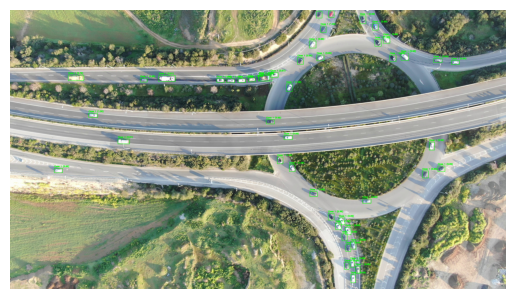

In [ ]:
# Loading checkpoints and prediction

# Function to load the latest checkpoint
def load_latest_checkpoint(checkpoint_dir, model, device):
    # Find all checkpoint files
    checkpoint_files = glob.glob(os.path.join(checkpoint_dir, "model_epoch_*.pth"))
    if not checkpoint_files:
        raise FileNotFoundError("No checkpoint files found in the directory.")

    # Get the checkpoint with the highest epoch number
    latest_checkpoint = max(checkpoint_files, key=lambda x: int(x.split('_')[-1].split('.')[0]))
    print(f"Loading latest checkpoint: {latest_checkpoint}")

    # Load the checkpoint
    checkpoint = torch.load(latest_checkpoint, map_location=device)

    # Check if checkpoint is a dictionary with 'model_state_dict'
    if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
        model.load_state_dict(checkpoint['model_state_dict'])
    else:
        model.load_state_dict(checkpoint)

    return model

# Initialize the model (same configuration as during training)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = fasterrcnn_resnet50_fpn(weights="FasterRCNN_ResNet50_FPN_Weights.COCO_V1")
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 4)  # 3 classes + background
model.to(device)

# Load the latest checkpoint
checkpoint_dir = "/content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints"
model = load_latest_checkpoint(checkpoint_dir, model, device)

# Set model to evaluation mode
model.eval()

# Option 1: Predict on the validation dataset
# Load dataset
dataset = CustomDataset("/content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/train", transforms=transform)
indices = torch.randperm(len(dataset)).tolist()
train_dataset = torch.utils.data.Subset(dataset, indices[:-50])
valid_dataset = torch.utils.data.Subset(dataset, indices[-50:])
valid_loader = DataLoader(valid_dataset, batch_size=4, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))
with torch.no_grad():
    for images, targets in valid_loader:
        images = list(img.to(device) for img in images)
        outputs = model(images)
        for i, output in enumerate(outputs):
            print(f"Image {i+1}:")
            print("Predicted Boxes:", output['boxes'].cpu().numpy())
            print("Predicted Labels:", output['labels'].cpu().numpy())
            print("Confidence Scores:", output['scores'].cpu().numpy())
            print("-" * 50)

# Option 2: Predict on a single image
def predict_single_image(image_path, model, transform, device):
    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).to(device)

    # Add batch dimension
    image_tensor = image_tensor.unsqueeze(0)

    # Get predictions
    with torch.no_grad():
        predictions = model(image_tensor)[0]

    # Move predictions to CPU and convert to numpy
    boxes = predictions['boxes'].cpu().numpy()
    labels = predictions['labels'].cpu().numpy()
    scores = predictions['scores'].cpu().numpy()

    return boxes, labels, scores

# Example usage for a single image
image_path = "/content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/test/images/DJI_0033 (7_24)_n340.jpg"
boxes, labels, scores = predict_single_image(image_path, model, transform, device)
print("Single Image Predictions:")
print("Boxes:", boxes)
print("Labels:", labels)
print("Scores:", scores)

# Optional: Visualize predictions (requires OpenCV or Matplotlib)
import cv2
def visualize_predictions(image_path, boxes, labels, scores, score_threshold=0.5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for box, label, score in zip(boxes, labels, scores):
        if score >= score_threshold:
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f"Class {label} ({score:.2f})", (x1, y1-10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Save or display the image
    cv2.imwrite("output_image.jpg", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    # Alternatively, display using matplotlib
    import matplotlib.pyplot as plt
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Visualize predictions for the single image
visualize_predictions(image_path, boxes, labels, scores)

In [ ]:
from ultralytics import YOLO
import cv2

# Paths
YOLO_MODEL_PATH = "/content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8/yolov8n_results2/weights/best.pt"
IMAGE_PATH = "/content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/test/images/lim_4005.jpg"
OUTPUT_IMAGE_PATH = "/content/drive/MyDrive/TrafficDetectionHW/outputs/predictions/yolo_pred_DJI_0033_7_24_n340.jpg"

# Load the trained YOLOv8 model
model = YOLO(YOLO_MODEL_PATH)

# Perform detection on the image
results = model.predict(IMAGE_PATH, conf=0.5, iou=0.5)

# Load the image for annotation
img = cv2.imread(IMAGE_PATH)
if img is None:
    raise FileNotFoundError(f"Image not found at {IMAGE_PATH}")

# Class names (based on UAVDT dataset: car, truck, bus)
class_names = {0: "car", 1: "truck", 2: "bus"}

# Process and print detections, draw bounding boxes
for result in results:
    boxes = result.boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]
    scores = result.boxes.conf.cpu().numpy()  # Confidence scores
    classes = result.boxes.cls.cpu().numpy().astype(int)  # Class IDs

    print(f"Detections for {IMAGE_PATH}:")
    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = map(int, box)
        label = f"{class_names[cls]} {score:.2f}"
        print(f"- {label} at ({x1}, {y1}, {x2}, {y2})")

        # Draw bounding box and label on the image
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Save the annotated image
cv2.imwrite(OUTPUT_IMAGE_PATH, img)
print(f"Annotated image saved to {OUTPUT_IMAGE_PATH}")


image 1/1 /content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/test/images/lim_4005.jpg: 384x640 143 cars, 111.3ms
Speed: 9.4ms preprocess, 111.3ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)
Detections for /content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/test/images/lim_4005.jpg:
- car 0.82 at (529, 403, 564, 423)
- car 0.80 at (1044, 297, 1075, 326)
- car 0.80 at (1823, 557, 1854, 574)
- car 0.79 at (768, 447, 802, 466)
- car 0.78 at (889, 488, 910, 525)
- car 0.78 at (1173, 131, 1192, 158)
- car 0.77 at (1397, 314, 1428, 334)
- car 0.76 at (647, 979, 678, 996)
- car 0.76 at (703, 442, 733, 460)
- car 0.76 at (86, 787, 114, 822)
- car 0.76 at (795, 249, 819, 277)
- car 0.76 at (1295, 473, 1328, 493)
- car 0.76 at (1823, 397, 1854, 416)
- car 0.76 at (635, 354, 676, 374)
- car 0.75 at (335, 806, 362, 832)
- car 0.75 at (1101, 242, 1127, 272)
- car 0.75 at (1173, 494, 1196, 517)
- car 0.75 at (733, 421, 767, 439)
- car 0.74 at (1273, 258, 1293, 285)
- 

**Faster Rnn Evaluation on Test Data**

Using device: cuda


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 189MB/s]


Loading Faster R-CNN checkpoint: /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints/model_epoch_10.pth
Faster R-CNN model loaded from: /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints
Loaded 272 test images for Faster R-CNN evaluation.

Starting Faster R-CNN inference and evaluation...
Processed 10/272 images for Faster R-CNN.
Processed 20/272 images for Faster R-CNN.
Processed 30/272 images for Faster R-CNN.
Processed 40/272 images for Faster R-CNN.
Processed 50/272 images for Faster R-CNN.
Processed 60/272 images for Faster R-CNN.
Processed 70/272 images for Faster R-CNN.
Processed 80/272 images for Faster R-CNN.
Processed 90/272 images for Faster R-CNN.
Processed 100/272 images for Faster R-CNN.
Processed 110/272 images for Faster R-CNN.
Processed 120/272 images for Faster R-CNN.
Processed 130/272 images for Faster R-CNN.
Processed 140/272 images for Faster R-CNN.
Processed 150/272 images for Faster R-CNN.
Processed 160/272 images for Faster

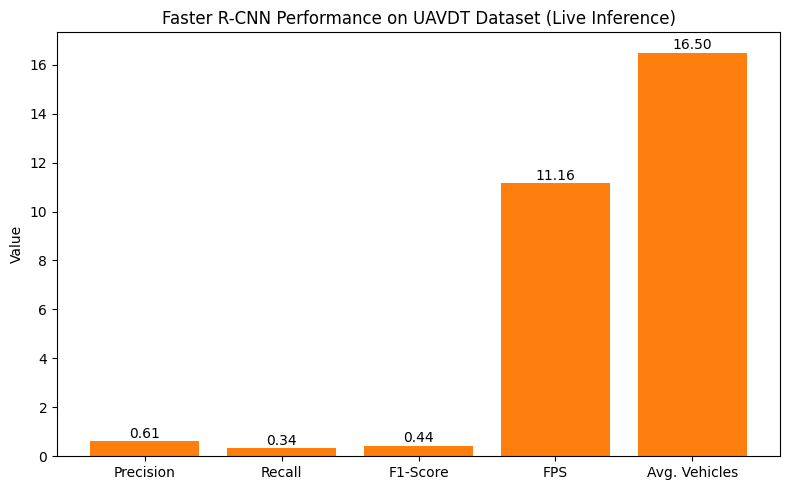

In [ ]:

import os
import cv2
import numpy as np
from pathlib import Path
from ultralytics import YOLO
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import glob
from PIL import Image
import time

# --- Common Paths ---
TEST_DATA_ROOT = "/content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/test"
TEST_IMAGES_PATH = os.path.join(TEST_DATA_ROOT, "images")
TEST_LABELS_PATH = os.path.join(TEST_DATA_ROOT, "labels")

# --- Faster R-CNN Specific Paths ---
FRNN_CHECKPOINT_DIR = "/content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints"
OUTPUT_DIR_FRNN = "/content/drive/MyDrive/TrafficDetectionHW/outputs/predictions_frnn_live"
os.makedirs(OUTPUT_DIR_FRNN, exist_ok=True)

# --- Custom Dataset with Resizing for Faster R-CNN ---
class CustomDatasetFRCNN(Dataset):
    def __init__(self, root, transforms=None, target_size=(640, 640)):
        self.root = root
        self.transforms = transforms
        self.target_size = target_size
        self.img_dir = os.path.join(root, "images")
        self.label_dir = os.path.join(root, "labels")
        self.imgs = sorted([f for f in os.listdir(self.img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img_name = self.imgs[idx]
        img_path = os.path.join(self.img_dir, img_name)
        label_path = os.path.join(self.label_dir, img_name.replace(os.path.splitext(img_name)[1], ".txt"))

        # Load image
        img = Image.open(img_path).convert("RGB")
        orig_width, orig_height = img.size

        # Resize image for Faster R-CNN
        img_resized, scale_factor = self.resize_and_pad(img, self.target_size)

        # Load and convert bounding boxes
        boxes = [] # Will be in FRCNN format (pixel coords on resized image)
        labels = []
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f.readlines():
                    parts = list(map(float, line.strip().split()))
                    cls = int(parts[0])
                    if len(parts) >= 5:
                        xc, yc, w, h = parts[1:5] # Normalized YOLO format

                        # Convert YOLO normalized to original pixel coordinates
                        x1_orig = (xc - w / 2) * orig_width
                        y1_orig = (yc - h / 2) * orig_height
                        x2_orig = (xc + w / 2) * orig_width
                        y2_orig = (yc + h / 2) * orig_height

                        # Apply the same scaling and padding as the image
                        # This assumes padding is centered.
                        target_width, target_height = self.target_size
                        new_width, new_height = int(orig_width * scale_factor), int(orig_height * scale_factor)
                        offset_x = (target_width - new_width) // 2
                        offset_y = (target_height - new_height) // 2

                        x1_frcnn = x1_orig * scale_factor + offset_x
                        y1_frcnn = y1_orig * scale_factor + offset_y
                        x2_frcnn = x2_orig * scale_factor + offset_x
                        y2_frcnn = y2_orig * scale_factor + offset_y

                        boxes.append([x1_frcnn, y1_frcnn, x2_frcnn, y2_frcnn])
                        labels.append(int(cls) + 1) # Class 0 is background for FRCNN

        target = {
            "boxes": torch.tensor(boxes, dtype=torch.float32),
            "labels": torch.tensor(labels, dtype=torch.int64),
            "image_id": img_name,
            "orig_size": torch.tensor([orig_width, orig_height], dtype=torch.float32), # Convert to tensor
            "scale_factor": torch.tensor(scale_factor, dtype=torch.float32),
            "offset_x": torch.tensor(offset_x, dtype=torch.float32),
            "offset_y": torch.tensor(offset_y, dtype=torch.float32)
        }

        if self.transforms:
            img_resized = self.transforms(img_resized)

        return img_resized, target

    def resize_and_pad(self, img, target_size):
        orig_width, orig_height = img.size
        target_width, target_height = target_size

        scale = min(target_width / orig_width, target_height / orig_height)
        new_width, new_height = int(orig_width * scale), int(orig_height * scale)

        img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)

        new_img = Image.new("RGB", target_size, (0, 0, 0)) # Pad with black
        offset_x = (target_width - new_width) // 2
        offset_y = (target_height - new_height) // 2

        new_img.paste(img, (offset_x, offset_y))
        return new_img, scale

# --- Evaluation Functions (adjusted for YOLO format) ---
def compute_iou_yolo(box1, box2):
    # Convert from normalized center-width-height to x1y1x2y2
    # Assume boxes are already normalized [0,1]
    x1_1 = box1[0] - box1[2] / 2
    y1_1 = box1[1] - box1[3] / 2
    x1_2 = box1[0] + box1[2] / 2
    y1_2 = box1[1] + box1[3] / 2

    x2_1 = box2[0] - box2[2] / 2
    y2_1 = box2[1] - box2[3] / 2
    x2_2 = box2[0] + box2[2] / 2
    y2_2 = box2[1] + box2[3] / 2

    xi1 = max(x1_1, x2_1)
    yi1 = max(y1_1, y2_1)
    xi2 = min(x1_2, x2_2)
    yi2 = min(y1_2, y2_2)

    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    box1_area = box1[2] * box1[3]
    box2_area = box2[2] * box2[3]

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0

def evaluate_predictions_common(ground_truth, predictions, iou_threshold=0.5):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    # Store global indices of predictions that have been matched
    prediction_matched_flags = [False] * len(predictions)

    for gt_idx, gt in enumerate(ground_truth):
        img_id = gt['image_id']
        gt_bbox = gt['bbox']
        gt_class = gt['category_id']

        best_iou = 0
        best_pred_global_idx = -1

        # Find the best prediction for this ground truth among *unmatched* predictions
        for pred_global_idx, pred in enumerate(predictions):
            if not prediction_matched_flags[pred_global_idx] and \
               pred['image_id'] == img_id and \
               pred['category_id'] == gt_class:

                iou = compute_iou_yolo(gt_bbox, pred['bbox'])
                if iou > best_iou:
                    best_iou = iou
                    best_pred_global_idx = pred_global_idx

        if best_iou >= iou_threshold:
            true_positives += 1
            if best_pred_global_idx != -1:
                prediction_matched_flags[best_pred_global_idx] = True
        else:
            false_negatives += 1

    # Count false positives: any prediction that wasn't marked as matched
    for matched in prediction_matched_flags:
        if not matched:
            false_positives += 1

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    mAP_at_05 = 0 # Placeholder, as full mAP requires more detailed logic.

    return {'mAP@0.5': mAP_at_05, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}

# Function to convert Faster R-CNN pixel boxes (on padded image) to YOLO normalized format (on original image)
def frcnn_to_yolo_normalized(boxes_frcnn, orig_width, orig_height, scale_factor, offset_x, offset_y):
    yolo_boxes_normalized = []
    if boxes_frcnn.ndim == 1:
        boxes_frcnn = boxes_frcnn.reshape(1, -1)

    for box_frcnn in boxes_frcnn:
        x1_frcnn, y1_frcnn, x2_frcnn, y2_frcnn = box_frcnn[:4]

        # Convert back to coordinates on the scaled original image (before padding)
        x1_scaled = (x1_frcnn - offset_x) / scale_factor
        y1_scaled = (y1_frcnn - offset_y) / scale_factor
        x2_scaled = (x2_frcnn - offset_x) / scale_factor
        y2_scaled = (y2_frcnn - offset_y) / scale_factor

        # Normalize to original image dimensions
        x_center_norm = ((x1_scaled + x2_scaled) / 2) / orig_width
        y_center_norm = ((y1_scaled + y2_scaled) / 2) / orig_height
        width_norm = (x2_scaled - x1_scaled) / orig_width
        height_norm = (y2_scaled - y1_scaled) / orig_height

        # Clamp values to [0, 1] to handle potential floating point errors or boxes near boundaries
        x_center_norm = np.clip(x_center_norm, 0, 1)
        y_center_norm = np.clip(y_center_norm, 0, 1)
        width_norm = np.clip(width_norm, 0, 1)
        height_norm = np.clip(height_norm, 0, 1)

        yolo_boxes_normalized.append([x_center_norm, y_center_norm, width_norm, height_norm])
    return yolo_boxes_normalized


# --- Faster R-CNN Model Loading ---
def load_latest_checkpoint(checkpoint_dir, model, device):
    checkpoint_files = glob.glob(os.path.join(checkpoint_dir, "model_epoch_*.pth"))
    if not checkpoint_files:
        raise FileNotFoundError(f"No checkpoint files found in {checkpoint_dir}.")

    # Sort by epoch number to get the latest
    latest_checkpoint = max(checkpoint_files, key=lambda x: int(x.split('_')[-1].split('.')[0]))
    print(f"Loading Faster R-CNN checkpoint: {latest_checkpoint}")

    checkpoint = torch.load(latest_checkpoint, map_location=device)
    if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
        model.load_state_dict(checkpoint['model_state_dict'])
    else:
        model.load_state_dict(checkpoint)
    return model


# --- Main Faster R-CNN Evaluation Script ---
def evaluate_frcnn():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Initialize Faster R-CNN model
    frnn_model = fasterrcnn_resnet50_fpn(weights=None) # Start without pre-trained COCO weights
    # Adjust the head for 3 classes + background = 4 classes
    in_features = frnn_model.roi_heads.box_predictor.cls_score.in_features
    frnn_model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 4) # 3 vehicle classes + 1 background

    # Load custom checkpoint
    frnn_model = load_latest_checkpoint(FRNN_CHECKPOINT_DIR, frnn_model, device)
    frnn_model.to(device).eval() # Set to evaluation mode
    print(f"Faster R-CNN model loaded from: {FRNN_CHECKPOINT_DIR}")

    # Define transforms for the test set
    transform = T.Compose([T.ToTensor()])

    # Load test dataset
    test_dataset = CustomDatasetFRCNN(TEST_DATA_ROOT, transforms=transform)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=os.cpu_count())
    print(f"Loaded {len(test_dataset)} test images for Faster R-CNN evaluation.")

    frnn_predictions = []
    ground_truth_data = []
    frnn_vehicle_counts = []
    frnn_inference_times_live = []

    print("\nStarting Faster R-CNN inference and evaluation...")
    for i, (img_tensor_batch, target_batch) in enumerate(test_loader):
        # Unpack batch for single image processing
        img_tensor = img_tensor_batch[0]

        # Explicitly handle unpacking for batch_size=1
        img_name = target_batch['image_id'][0]
        orig_width = target_batch['orig_size'][0][0].item() # orig_size is a tensor of [width, height]
        orig_height = target_batch['orig_size'][0][1].item()
        scale_factor = target_batch['scale_factor'][0].item()
        offset_x = target_batch['offset_x'][0].item()
        offset_y = target_batch['offset_y'][0].item()

        gt_boxes_tensor = target_batch['boxes'][0] # This is a tensor of boxes for the current image
        gt_labels_tensor = target_batch['labels'][0] # This is a tensor of labels for the current image

        img_tensor = img_tensor.to(device)

        # Run Faster R-CNN inference
        start_time = time.time()
        with torch.no_grad():
            frnn_output = frnn_model(img_tensor.unsqueeze(0))[0] # Add batch dimension
        end_time = time.time()
        frnn_inference_times_live.append((end_time - start_time) * 1000) # Convert to ms

        boxes_frcnn = frnn_output['boxes'].cpu().numpy()
        scores = frnn_output['scores'].cpu().numpy()
        labels_frcnn = frnn_output['labels'].cpu().numpy()

        frnn_count = 0
        current_image_preds = []

        # Process Faster R-CNN results
        for box_frcnn, score, label_frcnn in zip(boxes_frcnn, scores, labels_frcnn):
            if score >= 0.5: # Confidence threshold
                # Convert FRCNN pixel box to YOLO normalized format for evaluation
                yolo_box_norm = frcnn_to_yolo_normalized(
                    np.array([box_frcnn]), orig_width, orig_height, scale_factor, offset_x, offset_y
                )[0]

                frnn_predictions.append({
                    'image_id': img_name,
                    'bbox': yolo_box_norm,
                    'score': float(score),
                    'category_id': int(label_frcnn) - 1 # Convert back to 0-indexed for UAVDT classes
                })
                current_image_preds.append((box_frcnn, score, label_frcnn))
                frnn_count += 1

        # --- Visualize and Save Faster R-CNN Predictions ---
        # Load the original image for visualization (not the resized/padded one)
        image_path_full = os.path.join(TEST_IMAGES_PATH, img_name)
        frnn_img_vis = cv2.imread(image_path_full)
        if frnn_img_vis is None:
            print(f"Error: Could not read image for visualization: {image_path_full}")
            continue

        for box_frcnn, score, label_frnn in current_image_preds:
            # Convert FRCNN box (on resized/padded image) back to original image coordinates for drawing
            x1_frcnn, y1_frcnn, x2_frcnn, y2_frcnn = box_frcnn[:4]
            x1_orig_img = int((x1_frcnn - offset_x) / scale_factor)
            y1_orig_img = int((y1_frcnn - offset_y) / scale_factor)
            x2_orig_img = int((x2_frcnn - offset_x) / scale_factor)
            y2_orig_img = int((y2_frcnn - offset_y) / scale_factor)

            cv2.rectangle(frnn_img_vis, (x1_orig_img, y1_orig_img), (x2_orig_img, y2_orig_img), (0, 255, 0), 2)
            cv2.putText(frnn_img_vis, f'Class {label_frnn-1} {score:.2f}', (x1_orig_img, y1_orig_img - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        cv2.imwrite(os.path.join(OUTPUT_DIR_FRNN, f"frnn_pred_{img_name}"), frnn_img_vis)

        frnn_vehicle_counts.append(frnn_count)

        # Collect Ground Truth
        # Convert the ground truth tensors to numpy arrays for processing
        gt_boxes_np = gt_boxes_tensor.numpy()
        gt_labels_np = gt_labels_tensor.numpy()

        for gt_box_np, gt_label_np in zip(gt_boxes_np, gt_labels_np):
            # Convert FRCNN pixel box to YOLO normalized format for consistency in `ground_truth_data`
            yolo_gt_box_norm = frcnn_to_yolo_normalized(
                np.array([gt_box_np]), orig_width, orig_height, scale_factor, offset_x, offset_y
            )[0]
            ground_truth_data.append({
                'image_id': img_name,
                'bbox': yolo_gt_box_norm,
                'category_id': int(gt_label_np) - 1 # Convert back to 0-indexed for UAVDT classes
            })

        if (i + 1) % 10 == 0:
            print(f"Processed {i + 1}/{len(test_dataset)} images for Faster R-CNN.")

    # Calculate Faster R-CNN metrics
    frnn_metrics = evaluate_predictions_common(ground_truth_data, frnn_predictions)
    frnn_metrics['FPS'] = 1000 / np.mean(frnn_inference_times_live) if frnn_inference_times_live else 0
    frnn_metrics['Avg_Vehicles'] = np.mean(frnn_vehicle_counts) if frnn_vehicle_counts else 0

    print("\n--- Faster R-CNN Performance Metrics ---")
    print(f"mAP@0.5 (approx): {frnn_metrics['mAP@0.5']:.3f}") # Note: This mAP is simplified
    print(f"Precision: {frnn_metrics['Precision']:.3f}")
    print(f"Recall: {frnn_metrics['Recall']:.3f}")
    print(f"F1-Score: {frnn_metrics['F1-Score']:.3f}")
    print(f"Average FPS: {frnn_metrics['FPS']:.2f}")
    print(f"Average Vehicles per Frame: {frnn_metrics['Avg_Vehicles']:.2f}")

    # Plotting (Faster R-CNN only)
    metrics_names = ['Precision', 'Recall', 'F1-Score', 'FPS', 'Avg. Vehicles']
    frnn_values = [
        frnn_metrics['Precision'],
        frnn_metrics['Recall'],
        frnn_metrics['F1-Score'],
        frnn_metrics['FPS'],
        frnn_metrics['Avg_Vehicles']
    ]

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(metrics_names, frnn_values, color='#ff7f0e')
    ax.set_ylabel('Value')
    ax.set_title('Faster R-CNN Performance on UAVDT Dataset (Live Inference)')
    for i, v in enumerate(frnn_values):
        ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR_FRNN, 'frnn_performance_live.png'))
    plt.show()


evaluate_frcnn()

Essemble

In [ ]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.ops import nms
import glob
from PIL import Image
import time

# --- Paths ---
YOLO_MODEL_PATH = "/content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8/yolov8n_results2/weights/best.pt"
FRNN_CHECKPOINT_DIR = "/content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints"
IMAGE_PATH = "/content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/test/images/DJI_0033 (7_24)_n340.jpg"
OUTPUT_DIR_ENSEMBLE = "/content/drive/MyDrive/TrafficDetectionHW/outputs/predictions_ensemble_live"
OUTPUT_IMAGE_PATH = os.path.join(OUTPUT_DIR_ENSEMBLE, "ensemble_pred_DJI_0033_7_24_n340.jpg")
os.makedirs(OUTPUT_DIR_ENSEMBLE, exist_ok=True)

# --- Helper Functions ---
def load_latest_checkpoint(checkpoint_dir, model, device):
    checkpoint_files = glob.glob(os.path.join(checkpoint_dir, "model_epoch_*.pth"))
    if not checkpoint_files:
        raise FileNotFoundError(f"No checkpoint files found in {checkpoint_dir}.")
    latest_checkpoint = max(checkpoint_files, key=lambda x: int(x.split('_')[-1].split('.')[0]))
    checkpoint = torch.load(latest_checkpoint, map_location=device)
    if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
        model.load_state_dict(checkpoint['model_state_dict'])
    else:
        model.load_state_dict(checkpoint)
    return model

def resize_and_pad(img, target_size=(640, 640)):
    orig_width, orig_height = img.size
    target_width, target_height = target_size
    scale = min(target_width / orig_width, target_height / orig_height)
    new_width, new_height = int(orig_width * scale), int(orig_height * scale)
    img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)
    new_img = Image.new("RGB", target_size, (0, 0, 0))
    offset_x = (target_width - new_width) // 2
    offset_y = (target_height - new_height) // 2
    new_img.paste(img, (offset_x, offset_y))
    return new_img, scale, offset_x, offset_y

def yolo_normalized_to_xyxy_pixel(boxes_yolo_norm, orig_width, orig_height):
    xc_pixel = boxes_yolo_norm[:, 0] * orig_width
    yc_pixel = boxes_yolo_norm[:, 1] * orig_height
    w_pixel = boxes_yolo_norm[:, 2] * orig_width
    h_pixel = boxes_yolo_norm[:, 3] * orig_height
    x1 = xc_pixel - w_pixel / 2
    y1 = yc_pixel - h_pixel / 2
    x2 = xc_pixel + w_pixel / 2
    y2 = yc_pixel + h_pixel / 2
    x1 = torch.clamp(x1, 0, orig_width)
    y1 = torch.clamp(y1, 0, orig_height)
    x2 = torch.clamp(x2, 0, orig_width)
    y2 = torch.clamp(y2, 0, orig_height)
    return torch.stack([x1, y1, x2, y2], dim=1)

# --- Main Ensemble Prediction ---
def ensemble_predict():
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Load YOLOv8 model
    yolo_model = YOLO(YOLO_MODEL_PATH)

    # Load Faster R-CNN model
    frnn_model = fasterrcnn_resnet50_fpn(weights=None)
    in_features = frnn_model.roi_heads.box_predictor.cls_score.in_features
    frnn_model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 4)  # 3 classes + background
    frnn_model = load_latest_checkpoint(FRNN_CHECKPOINT_DIR, frnn_model, device)
    frnn_model.to(device).eval()

    # Load and preprocess the image
    img = Image.open(IMAGE_PATH).convert("RGB")
    orig_width, orig_height = img.size

    # Resize and pad for Faster R-CNN
    img_frcnn, scale_factor, offset_x, offset_y = resize_and_pad(img)
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(img_frcnn).to(device)

    # Initialize lists for predictions
    yolo_boxes_xyxy_orig_list = []
    yolo_scores_list = []
    yolo_classes_list = []
    frcnn_boxes_xyxy_orig_list = []
    frcnn_scores_list = []
    frcnn_classes_list = []

    start_time = time.time()

    # YOLOv8 Inference
    yolo_results = yolo_model(IMAGE_PATH, conf=0.2, iou=0.2, verbose=False)
    for result in yolo_results:
        if result.boxes is not None and result.boxes.xywhn is not None:
            boxes_norm = result.boxes.xywhn.cpu()
            scores = result.boxes.conf.cpu()
            classes = result.boxes.cls.cpu().int()
            if len(boxes_norm) > 0:
                boxes_xyxy_orig = yolo_normalized_to_xyxy_pixel(boxes_norm, orig_width, orig_height)
                yolo_boxes_xyxy_orig_list.append(boxes_xyxy_orig)
                yolo_scores_list.append(scores)
                yolo_classes_list.append(classes)

    # Faster R-CNN Inference
    with torch.no_grad():
        frnn_output = frnn_model(img_tensor.unsqueeze(0))[0]
    if 'boxes' in frnn_output:
        frcnn_boxes_xyxy_padded = frnn_output['boxes'].cpu()
        frcnn_scores = frnn_output['scores'].cpu()
        frcnn_labels = frnn_output['labels'].cpu().int()
        if len(frcnn_boxes_xyxy_padded) > 0:
            frcnn_boxes_xyxy_orig = torch.zeros_like(frcnn_boxes_xyxy_padded)
            frcnn_boxes_xyxy_orig[:, 0] = (frcnn_boxes_xyxy_padded[:, 0] - offset_x) / scale_factor
            frcnn_boxes_xyxy_orig[:, 1] = (frcnn_boxes_xyxy_padded[:, 1] - offset_y) / scale_factor
            frcnn_boxes_xyxy_orig[:, 2] = (frcnn_boxes_xyxy_padded[:, 2] - offset_x) / scale_factor
            frcnn_boxes_xyxy_orig[:, 3] = (frcnn_boxes_xyxy_padded[:, 3] - offset_y) / scale_factor
            frcnn_boxes_xyxy_orig[:, 0] = torch.clamp(frcnn_boxes_xyxy_orig[:, 0], 0, orig_width)
            frcnn_boxes_xyxy_orig[:, 1] = torch.clamp(frcnn_boxes_xyxy_orig[:, 1], 0, orig_height)
            frcnn_boxes_xyxy_orig[:, 2] = torch.clamp(frcnn_boxes_xyxy_orig[:, 2], 0, orig_width)
            frcnn_boxes_xyxy_orig[:, 3] = torch.clamp(frcnn_boxes_xyxy_orig[:, 3], 0, orig_height)
            frcnn_classes = frcnn_labels - 1  # Adjust for 0-indexed classes
            frcnn_boxes_xyxy_orig_list.append(frcnn_boxes_xyxy_orig)
            frcnn_scores_list.append(frcnn_scores)
            frcnn_classes_list.append(frcnn_classes)

    # Combine Predictions
    all_boxes_xyxy_orig = torch.empty(0, 4)
    all_scores = torch.empty(0)
    all_classes = torch.empty(0, dtype=torch.int64)
    if yolo_boxes_xyxy_orig_list:
        all_boxes_xyxy_orig = torch.cat(yolo_boxes_xyxy_orig_list)
        all_scores = torch.cat(yolo_scores_list)
        all_classes = torch.cat(yolo_classes_list)
    if frcnn_boxes_xyxy_orig_list:
        all_boxes_xyxy_orig = torch.cat((all_boxes_xyxy_orig, torch.cat(frcnn_boxes_xyxy_orig_list)))
        all_scores = torch.cat((all_scores, torch.cat(frcnn_scores_list)))
        all_classes = torch.cat((all_classes, torch.cat(frcnn_classes_list)))

    # Apply NMS per Class
    final_boxes_xyxy_orig = []
    final_scores = []
    final_classes = []
    if len(all_boxes_xyxy_orig) > 0:
        unique_classes = torch.unique(all_classes)
        for cls in unique_classes:
            class_mask = (all_classes == cls)
            boxes_for_cls = all_boxes_xyxy_orig[class_mask]
            scores_for_cls = all_scores[class_mask]
            if len(boxes_for_cls) > 0:
                keep_indices = nms(boxes_for_cls, scores_for_cls, iou_threshold=0.5)
                final_boxes_xyxy_orig.append(boxes_for_cls[keep_indices])
                final_scores.append(scores_for_cls[keep_indices])
                final_classes.append(torch.full_like(scores_for_cls[keep_indices], fill_value=cls, dtype=torch.int64))
        if final_boxes_xyxy_orig:
            final_boxes_xyxy_orig = torch.cat(final_boxes_xyxy_orig)
            final_scores = torch.cat(final_scores)
            final_classes = torch.cat(final_classes)
        else:
            final_boxes_xyxy_orig = torch.empty(0, 4)
            final_scores = torch.empty(0)
            final_classes = torch.empty(0, dtype=torch.int64)

    # Final Confidence Threshold
    conf_threshold_ensemble = 0.5
    keep_indices_final = final_scores >= conf_threshold_ensemble
    final_boxes_xyxy_orig = final_boxes_xyxy_orig[keep_indices_final]
    final_scores = final_scores[keep_indices_final]
    final_classes = final_classes[keep_indices_final]

    end_time = time.time()
    inference_time_ms = (end_time - start_time) * 1000

    # Print Detections
    class_names = {0: "car", 1: "truck", 2: "bus"}
    print(f"\nEnsemble Detections for {IMAGE_PATH}:")
    for box, score, cls in zip(final_boxes_xyxy_orig.cpu().numpy(), final_scores.cpu().numpy(), final_classes.cpu().numpy()):
        x1, y1, x2, y2 = map(int, box)
        label = f"{class_names[int(cls)]} {score:.2f}"
        print(f"- {label} at ({x1}, {y1}, {x2}, {y2})")

    # Visualize and Save
    img_vis = cv2.imread(IMAGE_PATH)
    if img_vis is None:
        raise FileNotFoundError(f"Image not found at {IMAGE_PATH}")
    for box, score, cls in zip(final_boxes_xyxy_orig.cpu().numpy(), final_scores.cpu().numpy(), final_classes.cpu().numpy()):
        x1, y1, x2, y2 = map(int, box)
        label = f"Class {int(cls)} {score:.2f}"
        cv2.rectangle(img_vis, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue for ensemble
        cv2.putText(img_vis, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    cv2.imwrite(OUTPUT_IMAGE_PATH, img_vis)

    print(f"\nInference Time: {inference_time_ms:.2f} ms")
    print(f"Annotated image saved to {OUTPUT_IMAGE_PATH}")


ensemble_predict()


Ensemble Detections for /content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/test/images/DJI_0033 (7_24)_n340.jpg:
- car 0.99 at (3019, 328, 3097, 398)
- car 0.97 at (826, 992, 927, 1041)
- car 0.97 at (2133, 567, 2194, 643)
- car 0.96 at (593, 790, 683, 841)
- car 0.95 at (2619, 1791, 2681, 1871)
- car 0.92 at (2930, 341, 3001, 411)
- car 0.91 at (2304, 232, 2375, 300)
- car 0.91 at (2880, 195, 2948, 266)
- car 0.87 at (2295, 1389, 2382, 1452)
- car 0.86 at (327, 1218, 415, 1266)
- car 0.85 at (2811, 215, 2883, 284)
- car 0.83 at (2110, 960, 2199, 1009)
- car 0.80 at (2790, 90, 2857, 168)
- car 0.79 at (2151, 1187, 2211, 1261)
- car 0.79 at (2405, 127, 2446, 180)
- car 0.78 at (2451, 1565, 2519, 1632)
- car 0.78 at (609, 799, 675, 832)
- car 0.78 at (2939, 351, 2989, 397)
- car 0.77 at (2365, 342, 2436, 404)
- car 0.76 at (1762, 529, 1824, 564)
- car 0.75 at (2547, 1608, 2594, 1658)
- car 0.75 at (1994, 850, 2049, 882)
- car 0.74 at (3403, 383, 3489, 429)
- car 0.74 at (2639, 179

 Faster Rnn and Yolo Evaluation

Collected 7957 ground truth annotations for all evaluations.
Using device: cuda
YOLOv8 model loaded from: /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8/yolov8n_results2/weights/best.pt
Loaded 272 test images for YOLOv8 evaluation.

Starting YOLOv8 inference and evaluation...
Processed 10/272 images for YOLOv8.
Processed 20/272 images for YOLOv8.
Processed 30/272 images for YOLOv8.
Processed 40/272 images for YOLOv8.
Processed 50/272 images for YOLOv8.
Processed 60/272 images for YOLOv8.
Processed 70/272 images for YOLOv8.
Processed 80/272 images for YOLOv8.
Processed 90/272 images for YOLOv8.
Processed 100/272 images for YOLOv8.
Processed 110/272 images for YOLOv8.
Processed 120/272 images for YOLOv8.
Processed 130/272 images for YOLOv8.
Processed 140/272 images for YOLOv8.
Processed 150/272 images for YOLOv8.
Processed 160/272 images for YOLOv8.
Processed 170/272 images for YOLOv8.
Processed 180/272 images for YOLOv8.
Processed 190/272 images for YOLOv8.
Processed 200/

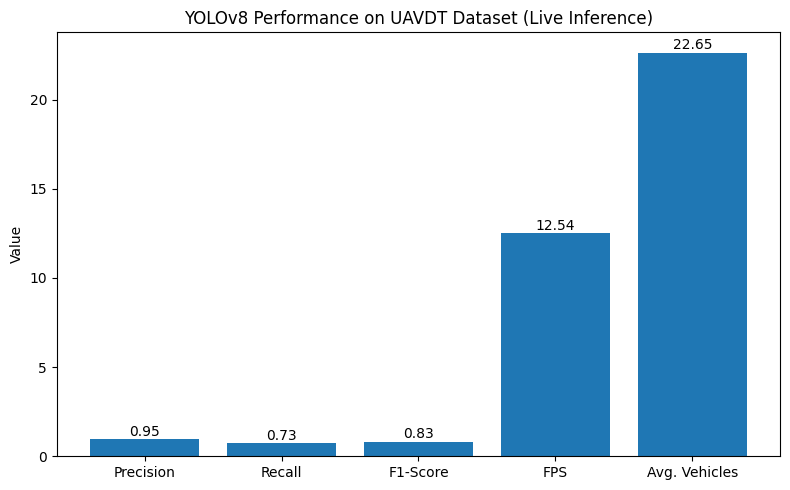

Using device: cuda
Loading Faster R-CNN checkpoint: /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints/model_epoch_10.pth
Faster R-CNN model loaded from: /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints
Loaded 272 test images for Faster R-CNN evaluation.

Starting Faster R-CNN inference and evaluation...
Processed 10/272 images for Faster R-CNN.
Processed 20/272 images for Faster R-CNN.
Processed 30/272 images for Faster R-CNN.
Processed 40/272 images for Faster R-CNN.
Processed 50/272 images for Faster R-CNN.
Processed 60/272 images for Faster R-CNN.
Processed 70/272 images for Faster R-CNN.
Processed 80/272 images for Faster R-CNN.
Processed 90/272 images for Faster R-CNN.
Processed 100/272 images for Faster R-CNN.
Processed 110/272 images for Faster R-CNN.
Processed 120/272 images for Faster R-CNN.
Processed 130/272 images for Faster R-CNN.
Processed 140/272 images for Faster R-CNN.
Processed 150/272 images for Faster R-CNN.
Processed 160/27

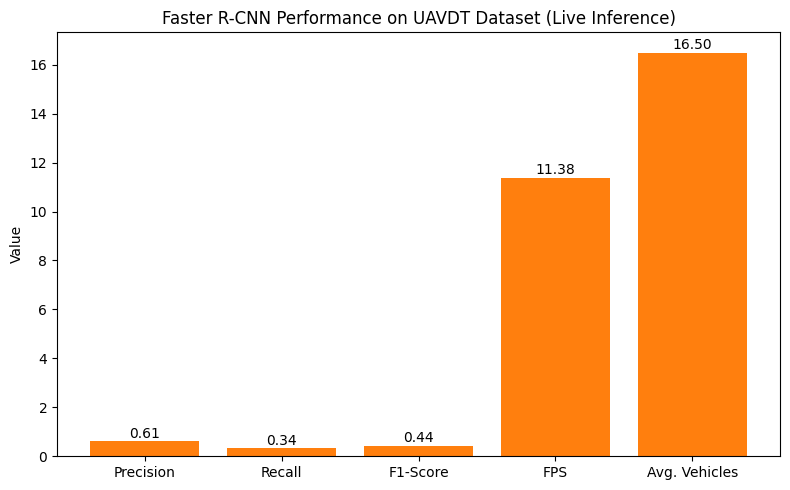


--- Starting Ensemble Evaluation ---
Using device: cuda
YOLOv8 model loaded from: /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8/yolov8n_results2/weights/best.pt
Loading Faster R-CNN checkpoint: /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints/model_epoch_10.pth
Faster R-CNN model loaded from: /content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints

Starting ensemble inference and evaluation...
Processed 10/272 images for Ensemble.
Processed 20/272 images for Ensemble.
Processed 30/272 images for Ensemble.
Processed 40/272 images for Ensemble.
Processed 50/272 images for Ensemble.
Processed 60/272 images for Ensemble.
Processed 70/272 images for Ensemble.
Processed 80/272 images for Ensemble.
Processed 90/272 images for Ensemble.
Processed 100/272 images for Ensemble.
Processed 110/272 images for Ensemble.
Processed 120/272 images for Ensemble.
Processed 130/272 images for Ensemble.
Processed 140/272 images for Ensemble.
Processed 15

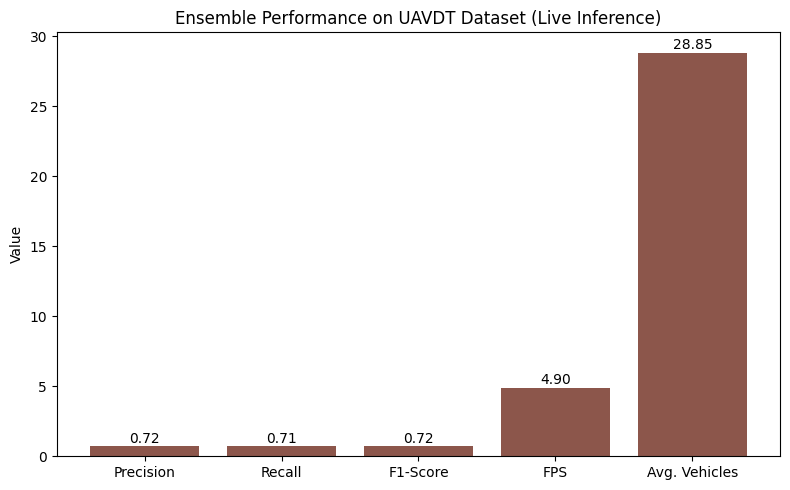

In [ ]:
import os
import cv2
import numpy as np
from pathlib import Path
from ultralytics import YOLO
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import glob
from PIL import Image
import time
from torchvision.ops import nms, box_convert

# --- Common Paths ---
TEST_DATA_ROOT = "/content/drive/MyDrive/TrafficDetectionHW/datasets/UAVDT/test"
TEST_IMAGES_PATH = os.path.join(TEST_DATA_ROOT, "images")
TEST_LABELS_PATH = os.path.join(TEST_DATA_ROOT, "labels")

# --- YOLOv8 Specific Paths ---
YOLO_MODEL_PATH = "/content/drive/MyDrive/TrafficDetectionHW/models/uavdt_yolov8/yolov8n_results2/weights/best.pt"
OUTPUT_DIR_YOLO = "/content/drive/MyDrive/TrafficDetectionHW/outputs/predictions_yolo_live"
os.makedirs(OUTPUT_DIR_YOLO, exist_ok=True)

# --- Faster R-CNN Specific Paths ---
FRNN_CHECKPOINT_DIR = "/content/drive/MyDrive/TrafficDetectionHW/models/uavdt_rnn/checkpoints"
OUTPUT_DIR_FRNN = "/content/drive/MyDrive/TrafficDetectionHW/outputs/predictions_frnn_live"
os.makedirs(OUTPUT_DIR_FRNN, exist_ok=True)

# --- Ensemble Specific Paths ---
OUTPUT_DIR_ENSEMBLE = "/content/drive/MyDrive/TrafficDetectionHW/outputs/predictions_ensemble_live"
os.makedirs(OUTPUT_DIR_ENSEMBLE, exist_ok=True)

# --- Custom Dataset for Ground Truth (YOLO format) ---
class YOLO_GT_Dataset(Dataset):
    def __init__(self, img_root, label_root):
        self.img_root = img_root
        self.label_root = label_root
        self.img_files = sorted([f for f in os.listdir(img_root) if f.endswith(('.jpg', '.jpeg', '.png'))])

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_name = self.img_files[idx]
        img_path = os.path.join(self.img_root, img_name)
        label_path = os.path.join(self.label_root, img_name.replace(os.path.splitext(img_name)[1], '.txt'))

        img = Image.open(img_path).convert("RGB")
        orig_width, orig_height = img.size

        boxes = [] # YOLO format: [x_center, y_center, width, height] (normalized)
        labels = []
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f.readlines():
                    parts = list(map(float, line.strip().split()))
                    cls = int(parts[0])
                    # Ensure bbox has 4 elements
                    if len(parts) >= 5:
                        xc, yc, w, h = parts[1:5]
                        boxes.append([xc, yc, w, h])
                        labels.append(cls)       # Class ID

        return img_name, orig_width, orig_height, {'boxes': torch.tensor(boxes, dtype=torch.float32), 'labels': torch.tensor(labels, dtype=torch.int64)}

# --- Custom Dataset with Resizing for Faster R-CNN ---
class CustomDatasetFRCNN(Dataset):
    def __init__(self, root, transforms=None, target_size=(640, 640)):
        self.root = root
        self.transforms = transforms
        self.target_size = target_size
        self.img_dir = os.path.join(root, "images")
        self.label_dir = os.path.join(root, "labels")
        self.imgs = sorted([f for f in os.listdir(self.img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img_name = self.imgs[idx]
        img_path = os.path.join(self.img_dir, img_name)
        label_path = os.path.join(self.label_dir, img_name.replace(os.path.splitext(img_name)[1], ".txt"))

        # Load image
        img = Image.open(img_path).convert("RGB")
        orig_width, orig_height = img.size

        # Resize image for Faster R-CNN
        img_resized, scale_factor = self.resize_and_pad(img, self.target_size)

        # Load and convert bounding boxes
        boxes = [] # Will be in FRCNN format (pixel coords on resized image)
        labels = []
        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                for line in f.readlines():
                    parts = list(map(float, line.strip().split()))
                    cls = int(parts[0])
                    if len(parts) >= 5:
                        xc, yc, w, h = parts[1:5] # Normalized YOLO format

                        # Convert YOLO normalized to original pixel coordinates
                        x1_orig = (xc - w / 2) * orig_width
                        y1_orig = (yc - h / 2) * orig_height
                        x2_orig = (xc + w / 2) * orig_width
                        y2_orig = (yc + h / 2) * orig_height

                        # Apply the same scaling and padding as the image
                        # This assumes padding is centered.
                        target_width, target_height = self.target_size
                        new_width, new_height = int(orig_width * scale_factor), int(orig_height * scale_factor)
                        offset_x = (target_width - new_width) // 2
                        offset_y = (target_height - new_height) // 2

                        x1_frcnn = x1_orig * scale_factor + offset_x
                        y1_frcnn = y1_orig * scale_factor + offset_y
                        x2_frcnn = x2_orig * scale_factor + offset_x
                        y2_frcnn = y2_orig * scale_factor + offset_y

                        boxes.append([x1_frcnn, y1_frcnn, x2_frcnn, y2_frcnn])
                        labels.append(int(cls) + 1) # Class 0 is background for FRCNN

        target = {
            "boxes": torch.tensor(boxes, dtype=torch.float32),
            "labels": torch.tensor(labels, dtype=torch.int64),
            "image_id": img_name,
            "orig_size": torch.tensor([orig_width, orig_height], dtype=torch.float32), # Convert to tensor
            "scale_factor": torch.tensor(scale_factor, dtype=torch.float32),
            "offset_x": torch.tensor(offset_x, dtype=torch.float32),
            "offset_y": torch.tensor(offset_y, dtype=torch.float32)
        }

        if self.transforms:
            img_resized = self.transforms(img_resized)

        return img_resized, target

    def resize_and_pad(self, img, target_size):
        orig_width, orig_height = img.size
        target_width, target_height = target_size

        scale = min(target_width / orig_width, target_height / orig_height)
        new_width, new_height = int(orig_width * scale), int(orig_height * scale)

        img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)

        new_img = Image.new("RGB", target_size, (0, 0, 0)) # Pad with black
        offset_x = (target_width - new_width) // 2
        offset_y = (target_height - new_height) // 2

        new_img.paste(img, (offset_x, offset_y))
        return new_img, scale

# --- Evaluation Functions (adjusted for YOLO format) ---
def compute_iou_yolo(box1, box2):
    # Convert from normalized center-width-height to x1y1x2y2
    # Assume boxes are already normalized [0,1]
    x1_1 = box1[0] - box1[2] / 2
    y1_1 = box1[1] - box1[3] / 2
    x1_2 = box1[0] + box1[2] / 2
    y1_2 = box1[1] + box1[3] / 2

    x2_1 = box2[0] - box2[2] / 2
    y2_1 = box2[1] - box2[3] / 2
    x2_2 = box2[0] + box2[2] / 2
    y2_2 = box2[1] + box2[3] / 2

    xi1 = max(x1_1, x2_1)
    yi1 = max(y1_1, y2_1)
    xi2 = min(x1_2, x2_2)
    yi2 = min(y1_2, y2_2)

    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    box1_area = box1[2] * box1[3]
    box2_area = box2[2] * box2[3]

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0

def evaluate_predictions_common(ground_truth, predictions, iou_threshold=0.5):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    # Store global indices of predictions that have been matched
    prediction_matched_flags = [False] * len(predictions)

    for gt_idx, gt in enumerate(ground_truth):
        img_id = gt['image_id']
        gt_bbox = gt['bbox']
        gt_class = gt['category_id']

        best_iou = 0
        best_pred_global_idx = -1

        # Find the best prediction for this ground truth among *unmatched* predictions
        for pred_global_idx, pred in enumerate(predictions):
            if not prediction_matched_flags[pred_global_idx] and \
               pred['image_id'] == img_id and \
               pred['category_id'] == gt_class:

                iou = compute_iou_yolo(gt_bbox, pred['bbox'])
                if iou > best_iou:
                    best_iou = iou
                    best_pred_global_idx = pred_global_idx

        if best_iou >= iou_threshold:
            true_positives += 1
            if best_pred_global_idx != -1:
                prediction_matched_flags[best_pred_global_idx] = True
        else:
            false_negatives += 1

    # Count false positives: any prediction that wasn't marked as matched
    for matched in prediction_matched_flags:
        if not matched:
            false_positives += 1

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    mAP_at_05 = 0 # Placeholder, as full mAP requires more detailed logic.

    return {'mAP@0.5': mAP_at_05, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}

# Helper function to convert YOLO normalized to XYXY pixel
def yolo_normalized_to_xyxy_pixel(boxes_yolo_norm, orig_width, orig_height):
    # boxes_yolo_norm: tensor or numpy array of shape (N, 4) in [xc, yc, w, h] normalized format
    # orig_width, orig_height: original image dimensions

    # Convert to pixel coordinates
    xc_pixel = boxes_yolo_norm[:, 0] * orig_width
    yc_pixel = boxes_yolo_norm[:, 1] * orig_height
    w_pixel = boxes_yolo_norm[:, 2] * orig_width
    h_pixel = boxes_yolo_norm[:, 3] * orig_height

    # Convert to x1y1x2y2 format
    x1 = xc_pixel - w_pixel / 2
    y1 = yc_pixel - h_pixel / 2
    x2 = xc_pixel + w_pixel / 2
    y2 = yc_pixel + h_pixel / 2

    # Clamp coordinates to image boundaries
    x1 = torch.clamp(x1, 0, orig_width)
    y1 = torch.clamp(y1, 0, orig_height)
    x2 = torch.clamp(x2, 0, orig_width)
    y2 = torch.clamp(y2, 0, orig_height)

    return torch.stack([x1, y1, x2, y2], dim=1) # Returns tensor

# Helper function to convert XYXY pixel to YOLO normalized
def xyxy_pixel_to_yolo_normalized(boxes_xyxy_pixel, orig_width, orig_height):
    # boxes_xyxy_pixel: tensor or numpy array of shape (N, 4) in [x1, y1, x2, y2] pixel format
    # orig_width, orig_height: original image dimensions

    x1, y1, x2, y2 = boxes_xyxy_pixel[:, 0], boxes_xyxy_pixel[:, 1], boxes_xyxy_pixel[:, 2], boxes_xyxy_pixel[:, 3]

    xc_norm = ((x1 + x2) / 2) / orig_width
    yc_norm = ((y1 + y2) / 2) / orig_height
    width_norm = (x2 - x1) / orig_width
    height_norm = (y2 - y1) / orig_height

    return torch.stack([xc_norm, yc_norm, width_norm, height_norm], dim=1) # Returns tensor


# --- Main YOLOv8 Evaluation Script ---
def evaluate_yolov8(ground_truth_data_all): # Pass ground_truth_data_all
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Load YOLOv8 model
    yolo_model = YOLO(YOLO_MODEL_PATH)
    print(f"YOLOv8 model loaded from: {YOLO_MODEL_PATH}")

    # Load test dataset
    test_dataset = YOLO_GT_Dataset(TEST_IMAGES_PATH, TEST_LABELS_PATH)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=os.cpu_count())
    print(f"Loaded {len(test_dataset)} test images for YOLOv8 evaluation.")

    yolo_predictions = []
    yolo_vehicle_counts = []
    yolo_inference_times_live = []

    print("\nStarting YOLOv8 inference and evaluation...")
    for i, (img_name_batch, orig_width_batch, orig_height_batch, _) in enumerate(test_loader):
        # Unpack batch for single image processing
        img_name = img_name_batch[0]
        orig_width = orig_width_batch.item()
        orig_height = orig_height_batch.item()

        image_path_full = os.path.join(TEST_IMAGES_PATH, img_name)
        if not os.path.exists(image_path_full):
            print(f"Warning: Image file not found: {image_path_full}. Skipping.")
            continue

        # Run YOLOv8 inference
        start_time = time.time()
        results = yolo_model(image_path_full, conf=0.5, iou=0.5, verbose=False) # verbose=False to suppress individual image outputs
        end_time = time.time()
        yolo_inference_times_live.append((end_time - start_time) * 1000) # Convert to ms

        yolo_count = 0
        current_image_preds = []

        # Process YOLOv8 results
        for result in results:
            if result.boxes is not None and result.boxes.xywhn is not None: # Check if detections exist and normalized boxes are available
                boxes = result.boxes.xywhn.cpu().numpy()  # Normalized xywh boxes
                scores = result.boxes.conf.cpu().numpy()
                classes = result.boxes.cls.cpu().numpy().astype(int)

                for box, score, cls in zip(boxes, scores, classes):
                    yolo_predictions.append({
                        'image_id': img_name,
                        'bbox': box.tolist(), # Already normalized YOLO format
                        'score': float(score),
                        'category_id': int(cls)
                    })
                    current_image_preds.append((box, score, cls))
                    yolo_count += 1

            # --- Visualize and Save YOLOv8 Predictions ---
            yolo_img_vis = cv2.imread(image_path_full)
            if yolo_img_vis is None:
                print(f"Error: Could not read image for visualization: {image_path_full}")
                continue

            for box, score, cls in current_image_preds:
                # Convert normalized YOLO bbox to pixel coordinates for drawing
                x_center, y_center, width, height = box
                x1 = int((x_center - width/2) * orig_width)
                y1 = int((y_center - height/2) * orig_height)
                x2 = int((x_center + width/2) * orig_width)
                y2 = int((y_center + height/2) * orig_height)

                cv2.rectangle(yolo_img_vis, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(yolo_img_vis, f'Class {cls} {score:.2f}', (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            cv2.imwrite(os.path.join(OUTPUT_DIR_YOLO, f"yolo_pred_{img_name}"), yolo_img_vis)

        yolo_vehicle_counts.append(yolo_count)

        if (i + 1) % 10 == 0:
            print(f"Processed {i + 1}/{len(test_dataset)} images for YOLOv8.")

    # Calculate YOLOv8 metrics
    yolo_metrics = evaluate_predictions_common(ground_truth_data_all, yolo_predictions)
    yolo_metrics['FPS'] = 1000 / np.mean(yolo_inference_times_live) if yolo_inference_times_live else 0
    yolo_metrics['Avg_Vehicles'] = np.mean(yolo_vehicle_counts) if yolo_vehicle_counts else 0

    print("\n--- YOLOv8 Performance Metrics ---")
    print(f"mAP@0.5 (approx): {yolo_metrics['mAP@0.5']:.3f}") # Note: This mAP is simplified
    print(f"Precision: {yolo_metrics['Precision']:.3f}")
    print(f"Recall: {yolo_metrics['Recall']:.3f}")
    print(f"F1-Score: {yolo_metrics['F1-Score']:.3f}")
    print(f"Average FPS: {yolo_metrics['FPS']:.2f}")
    print(f"Average Vehicles per Frame: {yolo_metrics['Avg_Vehicles']:.2f}")

    # Plotting (YOLOv8 only)
    metrics_names = ['Precision', 'Recall', 'F1-Score', 'FPS', 'Avg. Vehicles']
    yolo_values = [
        yolo_metrics['Precision'],
        yolo_metrics['Recall'],
        yolo_metrics['F1-Score'],
        yolo_metrics['FPS'],
        yolo_metrics['Avg_Vehicles']
    ]

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(metrics_names, yolo_values, color='#1f77b4')
    ax.set_ylabel('Value')
    ax.set_title('YOLOv8 Performance on UAVDT Dataset (Live Inference)')
    for i, v in enumerate(yolo_values):
        ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR_YOLO, 'yolov8_performance_live.png'))
    plt.show()


# --- Faster R-CNN Model Loading ---
def load_latest_checkpoint(checkpoint_dir, model, device):
    checkpoint_files = glob.glob(os.path.join(checkpoint_dir, "model_epoch_*.pth"))
    if not checkpoint_files:
        raise FileNotFoundError(f"No checkpoint files found in {checkpoint_dir}.")

    # Sort by epoch number to get the latest
    latest_checkpoint = max(checkpoint_files, key=lambda x: int(x.split('_')[-1].split('.')[0]))
    print(f"Loading Faster R-CNN checkpoint: {latest_checkpoint}")

    checkpoint = torch.load(latest_checkpoint, map_location=device)
    if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
        model.load_state_dict(checkpoint['model_state_dict'])
    else:
        model.load_state_dict(checkpoint)
    return model


# --- Main Faster R-CNN Evaluation Script ---
def evaluate_frcnn(ground_truth_data_all): # Pass ground_truth_data_all
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Initialize Faster R-CNN model
    frnn_model = fasterrcnn_resnet50_fpn(weights=None) # Start without pre-trained COCO weights
    # Adjust the head for 3 classes + background = 4 classes
    in_features = frnn_model.roi_heads.box_predictor.cls_score.in_features
    frnn_model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 4) # 3 vehicle classes + 1 background

    # Load custom checkpoint
    frnn_model = load_latest_checkpoint(FRNN_CHECKPOINT_DIR, frnn_model, device)
    frnn_model.to(device).eval() # Set to evaluation mode
    print(f"Faster R-CNN model loaded from: {FRNN_CHECKPOINT_DIR}")

    # Define transforms for the test set
    transform = T.Compose([T.ToTensor()])

    # Load test dataset
    test_dataset = CustomDatasetFRCNN(TEST_DATA_ROOT, transforms=transform)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=os.cpu_count())
    print(f"Loaded {len(test_dataset)} test images for Faster R-CNN evaluation.")

    frnn_predictions = []
    frnn_vehicle_counts = []
    frnn_inference_times_live = []

    print("\nStarting Faster R-CNN inference and evaluation...")
    for i, (img_tensor_batch, target_batch) in enumerate(test_loader):
        # Unpack batch for single image processing
        img_tensor = img_tensor_batch[0]

        # Explicitly handle unpacking for batch_size=1
        img_name = target_batch['image_id'][0]
        orig_width = target_batch['orig_size'][0][0].item() # orig_size is a tensor of [width, height]
        orig_height = target_batch['orig_size'][0][1].item()
        scale_factor = target_batch['scale_factor'][0].item()
        offset_x = target_batch['offset_x'][0].item()
        offset_y = target_batch['offset_y'][0].item()

        img_tensor = img_tensor.to(device)

        # Run Faster R-CNN inference
        start_time = time.time()
        with torch.no_grad():
            frnn_output = frnn_model(img_tensor.unsqueeze(0))[0] # Add batch dimension
        end_time = time.time()
        frnn_inference_times_live.append((end_time - start_time) * 1000) # Convert to ms

        boxes_frcnn = frnn_output['boxes'].cpu().numpy()
        scores = frnn_output['scores'].cpu().numpy()
        labels_frcnn = frnn_output['labels'].cpu().numpy()

        frnn_count = 0
        current_image_preds = []

        # Process Faster R-CNN results
        for box_frcnn, score, label_frcnn in zip(boxes_frcnn, scores, labels_frcnn):
            if score >= 0.5: # Confidence threshold
                # Convert FRCNN pixel box to YOLO normalized format for evaluation
                yolo_box_norm = frcnn_to_yolo_normalized(
                    np.array([box_frcnn]), orig_width, orig_height, scale_factor, offset_x, offset_y
                )[0]

                frnn_predictions.append({
                    'image_id': img_name,
                    'bbox': yolo_box_norm,
                    'score': float(score),
                    'category_id': int(label_frcnn) - 1 # Convert back to 0-indexed for UAVDT classes
                })
                current_image_preds.append((box_frcnn, score, label_frcnn))
                frnn_count += 1

        # --- Visualize and Save Faster R-CNN Predictions ---
        # Load the original image for visualization (not the resized/padded one)
        image_path_full = os.path.join(TEST_IMAGES_PATH, img_name)
        frnn_img_vis = cv2.imread(image_path_full)
        if frnn_img_vis is None:
            print(f"Error: Could not read image for visualization: {image_path_full}")
            continue

        for box_frcnn, score, label_frnn in current_image_preds:
            # Convert FRCNN box (on resized/padded image) back to original image coordinates for drawing
            x1_frcnn, y1_frcnn, x2_frcnn, y2_frcnn = box_frcnn[:4]
            x1_orig_img = int((x1_frcnn - offset_x) / scale_factor)
            y1_orig_img = int((y1_frcnn - offset_y) / scale_factor)
            x2_orig_img = int((x2_frcnn - offset_x) / scale_factor)
            y2_orig_img = int((y2_frcnn - offset_y) / scale_factor)

            cv2.rectangle(frnn_img_vis, (x1_orig_img, y1_orig_img), (x2_orig_img, y2_orig_img), (0, 255, 0), 2)
            cv2.putText(frnn_img_vis, f'Class {label_frnn-1} {score:.2f}', (x1_orig_img, y1_orig_img - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        cv2.imwrite(os.path.join(OUTPUT_DIR_FRNN, f"frnn_pred_{img_name}"), frnn_img_vis)

        frnn_vehicle_counts.append(frnn_count)

        if (i + 1) % 10 == 0:
            print(f"Processed {i + 1}/{len(test_dataset)} images for Faster R-CNN.")

    # Calculate Faster R-CNN metrics
    frnn_metrics = evaluate_predictions_common(ground_truth_data_all, frnn_predictions)
    frnn_metrics['FPS'] = 1000 / np.mean(frnn_inference_times_live) if frnn_inference_times_live else 0
    frnn_metrics['Avg_Vehicles'] = np.mean(frnn_vehicle_counts) if frnn_vehicle_counts else 0

    print("\n--- Faster R-CNN Performance Metrics ---")
    print(f"mAP@0.5 (approx): {frnn_metrics['mAP@0.5']:.3f}") # Note: This mAP is simplified
    print(f"Precision: {frnn_metrics['Precision']:.3f}")
    print(f"Recall: {frnn_metrics['Recall']:.3f}")
    print(f"F1-Score: {frnn_metrics['F1-Score']:.3f}")
    print(f"Average FPS: {frnn_metrics['FPS']:.2f}")
    print(f"Average Vehicles per Frame: {frnn_metrics['Avg_Vehicles']:.2f}")

    # Plotting (Faster R-CNN only)
    metrics_names = ['Precision', 'Recall', 'F1-Score', 'FPS', 'Avg. Vehicles']
    frnn_values = [
        frnn_metrics['Precision'],
        frnn_metrics['Recall'],
        frnn_metrics['F1-Score'],
        frnn_metrics['FPS'],
        frnn_metrics['Avg_Vehicles']
    ]

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(metrics_names, frnn_values, color='#ff7f0e')
    ax.set_ylabel('Value')
    ax.set_title('Faster R-CNN Performance on UAVDT Dataset (Live Inference)')
    for i, v in enumerate(frnn_values):
        ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR_FRNN, 'frnn_performance_live.png'))
    plt.show()

# --- Ensemble Function ---
def evaluate_ensemble(ground_truth_data_all):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"\n--- Starting Ensemble Evaluation ---")
    print(f"Using device: {device}")

    # Load YOLOv8 model
    yolo_model = YOLO(YOLO_MODEL_PATH)
    print(f"YOLOv8 model loaded from: {YOLO_MODEL_PATH}")

    # Initialize Faster R-CNN model
    frnn_model = fasterrcnn_resnet50_fpn(weights=None)
    in_features = frnn_model.roi_heads.box_predictor.cls_score.in_features
    frnn_model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 4) # 3 vehicle classes + 1 background
    frnn_model = load_latest_checkpoint(FRNN_CHECKPOINT_DIR, frnn_model, device)
    frnn_model.to(device).eval()
    print(f"Faster R-CNN model loaded from: {FRNN_CHECKPOINT_DIR}")

    # Load test dataset for both models
    yolo_test_dataset = YOLO_GT_Dataset(TEST_IMAGES_PATH, TEST_LABELS_PATH)
    yolo_test_loader = DataLoader(yolo_test_dataset, batch_size=1, shuffle=False, num_workers=os.cpu_count())

    frcnn_transform = T.Compose([T.ToTensor()])
    frcnn_test_dataset = CustomDatasetFRCNN(TEST_DATA_ROOT, transforms=frcnn_transform)
    frcnn_test_loader = DataLoader(frcnn_test_dataset, batch_size=1, shuffle=False, num_workers=os.cpu_count())

    # Ensure both loaders iterate in the same order and have the same length
    assert len(yolo_test_loader) == len(frcnn_test_loader), "Test datasets must have the same number of images for ensembling."

    ensemble_predictions = []
    ensemble_vehicle_counts = []
    ensemble_inference_times = []

    print("\nStarting ensemble inference and evaluation...")
    # Zip loaders to process corresponding images from both datasets
    for i, ((yolo_img_name_batch, yolo_orig_width_batch, yolo_orig_height_batch, _),
            (frcnn_img_tensor_batch, frcnn_target_batch)) in enumerate(zip(yolo_test_loader, frcnn_test_loader)):

        # Extract common image info
        img_name = yolo_img_name_batch[0]
        orig_width = yolo_orig_width_batch.item()
        orig_height = yolo_orig_height_batch.item()

        image_path_full = os.path.join(TEST_IMAGES_PATH, img_name)
        if not os.path.exists(image_path_full):
            print(f"Warning: Image file not found: {image_path_full}. Skipping.")
            continue # This continues the loop, so ensure variables are initialized below

        # --- Initialize prediction lists for current image (VERY IMPORTANT for NameError fix) ---
        # These ensure that even if a model has no detections or if the loop continues,
        # the subsequent concatenation steps don't fail due to undefined variables.
        yolo_boxes_xyxy_orig_list = []
        yolo_scores_list = []
        yolo_classes_list = []
        frcnn_boxes_xyxy_orig_list = []
        frcnn_scores_list = []
        frcnn_classes_list = []

        start_time = time.time()

        # --- YOLOv8 Inference ---
        # Using slightly lower confidence/iou for YOLO to capture more potential detections for ensembling
        yolo_results = yolo_model(image_path_full, conf=0.2, iou=0.2, verbose=False)

        for result in yolo_results:
            if result.boxes is not None and result.boxes.xywhn is not None:
                boxes_norm = result.boxes.xywhn.cpu()
                scores = result.boxes.conf.cpu()
                classes = result.boxes.cls.cpu().int()

                if len(boxes_norm) > 0:
                    boxes_xyxy_orig = yolo_normalized_to_xyxy_pixel(boxes_norm, orig_width, orig_height)
                    yolo_boxes_xyxy_orig_list.append(boxes_xyxy_orig)
                    yolo_scores_list.append(scores)
                    yolo_classes_list.append(classes)

        # --- Faster R-CNN Inference ---
        frcnn_img_tensor = frcnn_img_tensor_batch[0].to(device)
        with torch.no_grad():
            frnn_output_raw = frnn_model(frcnn_img_tensor.unsqueeze(0))[0] # Renamed to avoid original NameError variable name

        # Check if frnn_output_raw has expected keys before accessing
        if isinstance(frnn_output_raw, dict) and 'boxes' in frnn_output_raw and 'scores' in frnn_output_raw and 'labels' in frnn_output_raw:
            frcnn_boxes_xyxy_padded = frnn_output_raw['boxes'].cpu()
            frcnn_scores = frnn_output_raw['scores'].cpu()
            frcnn_labels_frcnn_plus_1 = frnn_output_raw['labels'].cpu().int()

            if len(frcnn_boxes_xyxy_padded) > 0:
                # Unpack FRCNN transformation parameters (from the frcnn_target_batch)
                scale_factor = frcnn_target_batch['scale_factor'][0].item()
                offset_x = frcnn_target_batch['offset_x'][0].item()
                offset_y = frcnn_target_batch['offset_y'][0].item()

                # Convert FRCNN boxes from padded coordinates to original image coordinates
                frcnn_boxes_xyxy_orig = torch.zeros_like(frcnn_boxes_xyxy_padded)
                frcnn_boxes_xyxy_orig[:, 0] = (frcnn_boxes_xyxy_padded[:, 0] - offset_x) / scale_factor
                frcnn_boxes_xyxy_orig[:, 1] = (frcnn_boxes_xyxy_padded[:, 1] - offset_y) / scale_factor
                frcnn_boxes_xyxy_orig[:, 2] = (frcnn_boxes_xyxy_padded[:, 2] - offset_x) / scale_factor
                frcnn_boxes_xyxy_orig[:, 3] = (frcnn_boxes_xyxy_padded[:, 3] - offset_y) / scale_factor

                # Clamp coordinates to original image boundaries (important after scaling)
                frcnn_boxes_xyxy_orig[:, 0] = torch.clamp(frcnn_boxes_xyxy_orig[:, 0], 0, orig_width)
                frcnn_boxes_xyxy_orig[:, 1] = torch.clamp(frcnn_boxes_xyxy_orig[:, 1], 0, orig_height)
                frcnn_boxes_xyxy_orig[:, 2] = torch.clamp(frcnn_boxes_xyxy_orig[:, 2], 0, orig_width)
                frcnn_boxes_xyxy_orig[:, 3] = torch.clamp(frcnn_boxes_xyxy_orig[:, 3], 0, orig_height)

                # Adjust FRCNN labels (background class 0 to actual class 0)
                frcnn_classes_0_indexed = frcnn_labels_frcnn_plus_1 - 1

                frcnn_boxes_xyxy_orig_list.append(frcnn_boxes_xyxy_orig)
                frcnn_scores_list.append(frcnn_scores)
                frcnn_classes_list.append(frcnn_classes_0_indexed)

        # --- Combine All Detections ---
        # Initialize empty tensors, ensure they are on CPU for concatenation and NMS unless NMS is on GPU
        # These need to be initialized here as well, in case both lists (yolo/frcnn) are empty.
        all_boxes_xyxy_orig = torch.empty(0, 4)
        all_scores = torch.empty(0)
        all_classes = torch.empty(0, dtype=torch.int64)

        if yolo_boxes_xyxy_orig_list:
            all_boxes_xyxy_orig = torch.cat((all_boxes_xyxy_orig, torch.cat(yolo_boxes_xyxy_orig_list)))
            all_scores = torch.cat((all_scores, torch.cat(yolo_scores_list)))
            all_classes = torch.cat((all_classes, torch.cat(yolo_classes_list)))

        if frcnn_boxes_xyxy_orig_list:
            all_boxes_xyxy_orig = torch.cat((all_boxes_xyxy_orig, torch.cat(frcnn_boxes_xyxy_orig_list)))
            all_scores = torch.cat((all_scores, torch.cat(frcnn_scores_list)))
            all_classes = torch.cat((all_classes, torch.cat(frcnn_classes_list)))

        final_boxes_xyxy_orig = []
        final_scores = []
        final_classes = []

        if len(all_boxes_xyxy_orig) > 0:
            # Apply NMS per class to the combined detections
            unique_classes = torch.unique(all_classes)
            for cls in unique_classes:
                class_mask = (all_classes == cls)
                boxes_for_cls = all_boxes_xyxy_orig[class_mask]
                scores_for_cls = all_scores[class_mask]

                # Apply NMS (can be on CPU, `torchvision.ops.nms` handles GPU if inputs are on GPU)
                if len(boxes_for_cls) > 0:
                    # NMS IoU threshold: Higher value (e.g., 0.5-0.7) means more overlap is allowed, keeping more boxes.
                    # Lower value (e.g., 0.3) is more aggressive, keeping fewer but more distinct boxes.
                    # Start with 0.5 as a balance.
                    keep_indices = nms(boxes_for_cls, scores_for_cls, iou_threshold=0.5)

                    final_boxes_xyxy_orig.append(boxes_for_cls[keep_indices])
                    final_scores.append(scores_for_cls[keep_indices])
                    final_classes.append(torch.full_like(scores_for_cls[keep_indices], fill_value=cls, dtype=torch.int64))

            if final_boxes_xyxy_orig: # Check if any boxes were kept after per-class NMS
                final_boxes_xyxy_orig = torch.cat(final_boxes_xyxy_orig)
                final_scores = torch.cat(final_scores)
                final_classes = torch.cat(final_classes)
            else: # If no boxes were kept, ensure tensors are empty
                final_boxes_xyxy_orig = torch.empty(0, 4)
                final_scores = torch.empty(0)
                final_classes = torch.empty(0, dtype=torch.int64)

        end_time = time.time()
        ensemble_inference_times.append((end_time - start_time) * 1000)

        # Apply a final confidence threshold for the ensembled results
        conf_threshold_ensemble = 0.5 # A common threshold for final output
        keep_indices_final = final_scores >= conf_threshold_ensemble
        final_boxes_xyxy_orig = final_boxes_xyxy_orig[keep_indices_final]
        final_scores = final_scores[keep_indices_final]
        final_classes = final_classes[keep_indices_final]

        ensemble_count = len(final_boxes_xyxy_orig)
        ensemble_vehicle_counts.append(ensemble_count)

        # Convert final ensembled boxes to YOLO normalized format for evaluation
        if len(final_boxes_xyxy_orig) > 0:
            final_boxes_yolo_norm = xyxy_pixel_to_yolo_normalized(final_boxes_xyxy_orig, orig_width, orig_height)
            for box, score, cls in zip(final_boxes_yolo_norm, final_scores, final_classes):
                ensemble_predictions.append({
                    'image_id': img_name,
                    'bbox': box.tolist(),
                    'score': float(score),
                    'category_id': int(cls)
                })

        # --- Visualize and Save Ensemble Predictions ---
        ensemble_img_vis = cv2.imread(image_path_full)
        if ensemble_img_vis is None:
            print(f"Error: Could not read image for visualization: {image_path_full}")
            continue

        for box_xyxy_orig, score, cls in zip(final_boxes_xyxy_orig.cpu().numpy(), final_scores.cpu().numpy(), final_classes.cpu().numpy()):
            x1, y1, x2, y2 = map(int, box_xyxy_orig)
            cv2.rectangle(ensemble_img_vis, (x1, y1), (x2, y2), (255, 0, 0), 2) # Blue color for ensemble
            cv2.putText(ensemble_img_vis, f'Class {cls} {score:.2f}', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        cv2.imwrite(os.path.join(OUTPUT_DIR_ENSEMBLE, f"ensemble_pred_{img_name}"), ensemble_img_vis)

        if (i + 1) % 10 == 0:
            print(f"Processed {i + 1}/{len(yolo_test_dataset)} images for Ensemble.")

    # Calculate Ensemble metrics
    ensemble_metrics = evaluate_predictions_common(ground_truth_data_all, ensemble_predictions)
    ensemble_metrics['FPS'] = 1000 / np.mean(ensemble_inference_times) if ensemble_inference_times else 0
    ensemble_metrics['Avg_Vehicles'] = np.mean(ensemble_vehicle_counts) if ensemble_vehicle_counts else 0

    print("\n--- Ensemble Performance Metrics ---")
    print(f"mAP@0.5 (approx): {ensemble_metrics['mAP@0.5']:.3f}")
    print(f"Precision: {ensemble_metrics['Precision']:.3f}")
    print(f"Recall: {ensemble_metrics['Recall']:.3f}")
    print(f"F1-Score: {ensemble_metrics['F1-Score']:.3f}")
    print(f"Average FPS: {ensemble_metrics['FPS']:.2f}")
    print(f"Average Vehicles per Frame: {ensemble_metrics['Avg_Vehicles']:.2f}")

    # Plotting (Ensemble only)
    metrics_names = ['Precision', 'Recall', 'F1-Score', 'FPS', 'Avg. Vehicles']
    ensemble_values = [
        ensemble_metrics['Precision'],
        ensemble_metrics['Recall'],
        ensemble_metrics['F1-Score'],
        ensemble_metrics['FPS'],
        ensemble_metrics['Avg_Vehicles']
    ]

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(metrics_names, ensemble_values, color='#8c564b')
    ax.set_ylabel('Value')
    ax.set_title('Ensemble Performance on UAVDT Dataset (Live Inference)')
    for i, v in enumerate(ensemble_values):
        ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR_ENSEMBLE, 'ensemble_performance_live.png'))
    plt.show()

# --- Main execution block ---
if __name__ == "__main__":
    # First, collect all ground truth data once for consistent evaluation across all models
    gt_dataset_for_all = YOLO_GT_Dataset(TEST_IMAGES_PATH, TEST_LABELS_PATH)
    ground_truth_data_for_evaluation = []
    for img_name_single, orig_width_single, orig_height_single, gt_target_single in DataLoader(gt_dataset_for_all, batch_size=1):
        gt_boxes_single = gt_target_single['boxes'][0].numpy()
        gt_labels_single = gt_target_single['labels'][0].numpy()
        for gt_box, gt_label in zip(gt_boxes_single, gt_labels_single):
            ground_truth_data_for_evaluation.append({
                'image_id': img_name_single[0],
                'bbox': gt_box.tolist(),
                'category_id': int(gt_label)
            })
    print(f"Collected {len(ground_truth_data_for_evaluation)} ground truth annotations for all evaluations.")

    # Now run evaluations for individual models and the ensemble
    evaluate_yolov8(ground_truth_data_for_evaluation)
    evaluate_frcnn(ground_truth_data_for_evaluation)
    evaluate_ensemble(ground_truth_data_for_evaluation)